# Anticipez les besoins en consommation électrique de bâtiments

**Problématique de la ville de Seattle**  
Des relevés minutieux ont été effectués par vos agents en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.

Votre prédiction se basera sur les données déclaratives du permis d'exploitation commerciale (taille et usage des bâtiments, mention de travaux récents, date de construction..)

Vous cherchez également à évaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe.

**Votre mission**  
Vous sortez tout juste d’une réunion de brief avec votre équipe. Voici un récapitulatif de votre mission :

- Réaliser une courte analyse exploratoire.
- Tester différents modèles de prédiction afin de répondre au mieux à la problématique.

L’objectif est de se passer des relevés de consommation annuels (attention à la fuite de données), mais rien n'interdit d’en déduire des variables plus simples (nature et proportions des sources d’énergie utilisées). 

Faire bien attention au traitement des différentes variables, à la fois pour trouver de nouvelles informations (peut-on déduire des choses intéressantes d’une simple adresse ?) et optimiser les performances en appliquant des transformations simples aux variables (normalisation, passage au log, etc.).

Mettre en place une évaluation rigoureuse des performances de la régression, et optimiser les hyperparamètres et le choix d’algorithme de ML à l’aide d’une validation croisée.

**Livrables attendus**  
- Un notebook de l'analyse exploratoire mis au propre et annoté.
- Le code (ou un notebook) des différents tests de modèles mis au propre, dans lequel vous identifierez clairement le modèle final choisi.
- Un support de présentation pour la soutenance.

**Compétences évaluées**  
- Mettre en place le modèle d'apprentissage supervisé adapté au problème métier
- Évaluer les performances d’un modèle d'apprentissage supervisé
- Adapter les hyperparamètres d'un algorithme d'apprentissage supervisé afin de l'améliorer
- Transformer les variables pertinentes d'un modèle d'apprentissage supervisé

__Techniques__
- ACP: réduction de dimension
- clustering hiérarchique
- knn


# Sommaire

__[I. Chargement et nettoyage des données](#I.-Chargement-et-nettoyage-des-données)__\
[I.1 Descriptions des indicateurs](#I.1-Descriptions-des-indicateurs)\
[I.2 Sélection des variables](#I.2-Sélection-des-variables)

__[II. Analyse exploratoire](#II.-Analyse-exploratoire)__\
[II.1 Variables qualitatives et variables quantitatives](#II.1-Variables-qualitatives-et-variables-quantitatives)\
[II.2 Variables quantitatives](#II.2-Variables-quantitatives)\
[II.2.1 Distribution des variables quantitatives](#II.2.1-Distribution-des-variables-quantitatives)\
[II.2.2 outliers](#II.2.2-outliers)\
[II.2.3 Transformation des variables cibles](#II.2.3-Transformation-des-variables-cibles)\
[II.2.4 Etude des corrélations](#II.2.4-Etude-des-corrélations)\
[II.2.4.i Variables cibles](#II.2.4.i-Variables-cibles)\
[II.2.4.ii Prédicteurs](#II.2.4.ii-Prédicteurs)\
[II.3 Variables catégorielles](#II.3-Variables-catégorielles)\
[II.3.1 Tour d'horizon des variables catégorielles](#II.3.1-Tour-d'horizon-des-variables-catégorielles)\
[II.3.2 Etude des corrélations](#II.3.2-Etude-des-corrélations)

__[III Modèles Linéaires](#III-Modèles-Linéaires)__\
[III.1 Régression linéaire simple avec toutes les variables](#III.1-Régression-linéaire-simple-avec-toutes-les-variables)\
[III.3 Ridge](#III.3-Ridge)\
[III.4 Lasso](#III.4-Lasso)\
[III.5 ElasticNet](#III.5-ElasticNet)

__[IV kNN](#IV-kNN)__

__[V SVM](#V-SVM)__

__[VI Modèles non-linéaires](#VI-Modèles-non-linéaires)__\
[VI.1 SVM à noyau](#VI.1-SVM-à-noyau)\
[VI.2 Régression ridge à noyau](#VI.2-Régression-ridge-à-noyau)

__[VII Méthodes ensemblistes](#VII-Méthodes-ensemblistes)__\
[VII.1 Forêts aléatoires](#VII.1-Forêts-aléatoires)\
[VII.2 GradientBoostingRegressor](#VII.2-GradientBoostingRegressor)

__[VIII Choix du modèle](#VIII-Choix-du-modèle)__

__[A suivre: Latitude, Longitude](#A-suivre:-Latitude,-Longitude)__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

# I. Chargement et nettoyage des données

## I.1 Descriptions des indicateurs

In [2]:
data2015 = pd.read_csv("./data/2015-building-energy-benchmarking.csv")
data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [3]:
indicators = pd.Series(data2015.columns, name="indicators")
indicators

0                                         OSEBuildingID
1                                              DataYear
2                                          BuildingType
3                                   PrimaryPropertyType
4                                          PropertyName
5                         TaxParcelIdentificationNumber
6                                              Location
7                                   CouncilDistrictCode
8                                          Neighborhood
9                                             YearBuilt
10                                    NumberofBuildings
11                                       NumberofFloors
12                                     PropertyGFATotal
13                                   PropertyGFAParking
14                               PropertyGFABuilding(s)
15                            ListOfAllPropertyUseTypes
16                               LargestPropertyUseType
17                            LargestPropertyUse

Maintenant 2016-building-energy-benchmarking

In [4]:
data2016 = pd.read_csv("./data/2016-building-energy-benchmarking.csv")
indicators_2016 = pd.Series(data2016.columns, name="indicators_2016")
indicators_2016

0                       OSEBuildingID
1                            DataYear
2                        BuildingType
3                 PrimaryPropertyType
4                        PropertyName
5                             Address
6                                City
7                               State
8                             ZipCode
9       TaxParcelIdentificationNumber
10                CouncilDistrictCode
11                       Neighborhood
12                           Latitude
13                          Longitude
14                          YearBuilt
15                  NumberofBuildings
16                     NumberofFloors
17                   PropertyGFATotal
18                 PropertyGFAParking
19             PropertyGFABuilding(s)
20          ListOfAllPropertyUseTypes
21             LargestPropertyUseType
22          LargestPropertyUseTypeGFA
23       SecondLargestPropertyUseType
24    SecondLargestPropertyUseTypeGFA
25        ThirdLargestPropertyUseType
26     Third

In [5]:
set(indicators_2016.to_numpy()).difference(indicators.to_numpy())

{'Address',
 'City',
 'Comments',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}

In [6]:
set(indicators.to_numpy()).difference(set(indicators_2016.to_numpy()))

{'2010 Census Tracts',
 'City Council Districts',
 'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes'}

#### Indicateurs 2015-building-energy-benchmarking

name | description 
--- | --- |
OSEBuildingID|A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.
"BuildingType"|"City of Seattle building type classification."
PrimaryPropertyType|The primary use of a property (e.g. office, retail store). Primary use is defined as a function that accounts for more than 50% of a property. This is the Property Type - EPA Calculated field from Portfolio Manager.
PropertyName|Official or common property name.
TaxParcelIdentificationNumber|Property King County PIN
CouncilDistrictCode|Property City of Seattle council district.
YearBuilt|Year in which a property was constructed or underwent a complete renovation.
PropertyGFATotal|Total building and parking gross floor area.
PropertyGFAParking|Total space in square feet of all types of parking (Fully Enclosed, Partially Enclosed, and Open).
PropertyGFABuilding(s)|Total floor space in square feet between the outside surfaces of a building’s enclosing walls. This includes all areas inside the building(s), such as tenant space, common areas, stairwells, basements, storage, etc.
ENERGYSTARScore|An EPA calculated 1-100 rating that assesses a property’s overall energy performance, based on national data to control for differences among climate, building uses, and operations. A score of 50 represents the national median.
SiteEUI(kBtu/sf)|Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot.
SiteEUIWN(kBtu/sf)|Weather Normalized (WN) Site Energy Use Intensity (EUI) is a property's WN Site Energy divided by its gross floor area (in square feet). WN Site Energy is the Site Energy Use the property would have consumed during 30-year average weather conditions. WN Site EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.
SourceEUI(kBtu/sf)|Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.
SourceEUIWN(kBtu/sf)|Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area. WN Source Energy is the Source Energy Use the property would have consumed during 30-year average weather conditions. WN Source EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.
SiteEnergyUse(kBtu)|The annual amount of energy consumed by the property from all sources of energy.
SteamUse(kBtu)|The annual amount of district steam consumed by the property on-site, measured in thousands of British thermal units (kBtu).
Electricity(kWh)|The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in kWh.
Electricity(kBtu)|The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).
NaturalGas(therms)|The annual amount of utility-supplied natural gas consumed by the property, measured in therms.
GHGEmissions(MetricTonsCO2e)|The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.
GHGEmissionsIntensity(kgCO2e/ft2)|Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources



#### Indicateurs 2016-building-energy-benchmarking

name | description 
--- | --- |
TotalGHGEmissions|The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh until the 2016 factor is available. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.
GHGEmissionsIntensity|Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources

Plusieurs indicateurs différents.

In [7]:
data2015.Location.iloc[0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

Il semblerait que les colonnes Latitude Longitude Address City State ZipCode soient contenues dans Location

Dans la table 2015, Zip Codes semble être générées automatiquement - on ne la garde pas dans un premier temps.

In [8]:
data2015.drop(columns="Zip Codes", inplace=True)

On va donc, dans la table 2015: 
- splitter Location en Latitude, Longitude, Address City State ZipCode
- Retirer Zip Codes

Renommer certaines colonnes pour assurer la correspondance avec 2016, de façon à fusionner les tables
- GHGEmissions(MetricTonsCO2e) (2015) et TotalGHGEmissions (2016) sont en fait les mêmes colonnes
- GHGEmissionsIntensity(kgCO2e/ft2) et GHGEmissionsIntensity sont les mêmes colonnes

In [9]:
from ast import literal_eval # module pour évaluer une expression et renvoyer l'objet correspondant

data2015["Location"] = data2015["Location"].apply(literal_eval) # convertit les str en dict
df = pd.json_normalize(data2015["Location"]) # Normalize semi-structured JSON data into a flat table.
df.human_address = df.human_address.apply(literal_eval)
df2 = pd.json_normalize(df.human_address)
df2.head()

,address,city,state,zip
0,405 OLIVE WAY,SEATTLE,WA,98101
1,724 PINE ST,SEATTLE,WA,98101
2,1900 5TH AVE,SEATTLE,WA,98101
3,620 STEWART ST,SEATTLE,WA,98101
4,401 LENORA ST,SEATTLE,WA,98121


In [10]:
loc = data2015.columns.get_loc("Location")
data2015.drop(columns="Location", inplace=True)
d = pd.concat([df.drop(columns="human_address"), df2], axis=1) # nouveau dataframe à partir des colonnes extraites

for c in d.columns[::-1]: # Insertion des colonnes dans le df original, une par une
    data2015.insert(loc, c, d[c])

data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,latitude,longitude,address,city,...,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,...,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,47.61310583,-122.33335756,724 PINE ST,SEATTLE,...,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,...,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,...,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,...,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0


On renomme les colonnes

In [11]:
data2015.rename(columns={"GHGEmissions(MetricTonsCO2e)":"TotalGHGEmissions",
                         "GHGEmissionsIntensity(kgCO2e/ft2)":"GHGEmissionsIntensity",
                         "Comment":"Comments",
                         "latitude":"Latitude", 
                         "longitude":"Longitude", 
                         "address":"Address", 
                         "city":"City",
                         "state":"State"}, inplace=True)

In [12]:
data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Latitude,Longitude,Address,City,...,TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,...,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,47.61310583,-122.33335756,724 PINE ST,SEATTLE,...,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,...,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,...,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,...,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0


In [144]:
# création du dataset global
raw_data = pd.concat([data2015, data2016], join="outer")

# Récupération de la liste de colonnes sous forme de Series
raw_data_cols = pd.Series(raw_data.columns, name="data_cols")

In [145]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 52 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  6716 non-null   int64  
 1   DataYear                                                       6716 non-null   int64  
 2   BuildingType                                                   6716 non-null   object 
 3   PrimaryPropertyType                                            6716 non-null   object 
 4   PropertyName                                                   6716 non-null   object 
 5   TaxParcelIdentificationNumber                                  6714 non-null   object 
 6   Latitude                                                       6716 non-null   object 
 7   Longitude                                                   

## I.2 Sélection des variables

<AxesSubplot:>

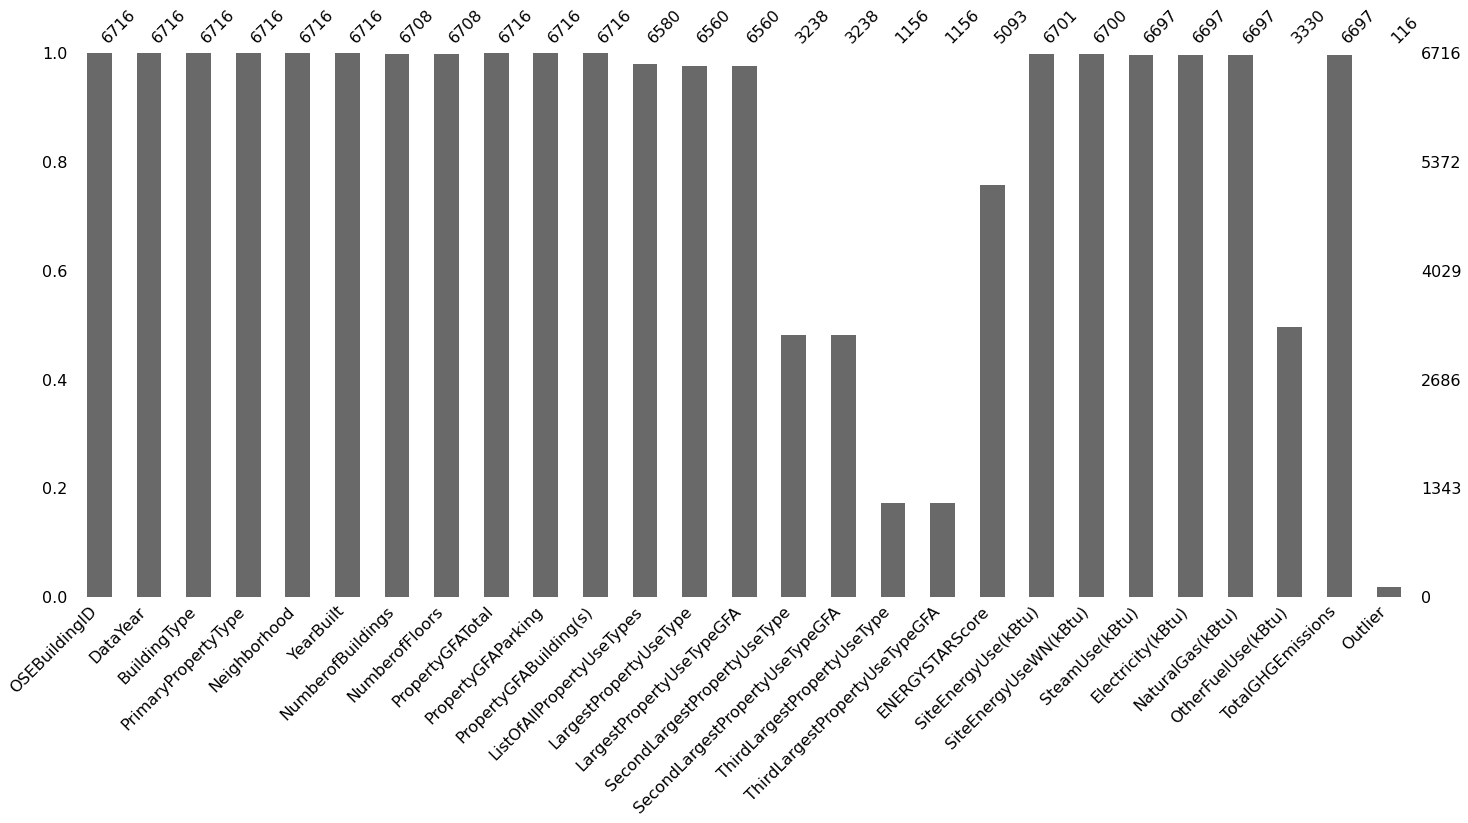

In [146]:
to_drop_index = [*range(4, 13), 27, *range(29, 33), 36, 38, *range(42, 46), *range(47,52)]
to_drop_cols = raw_data_cols.iloc[to_drop_index]

raw_data = raw_data.drop(columns=to_drop_cols)

msno.bar(raw_data)

<AxesSubplot:>

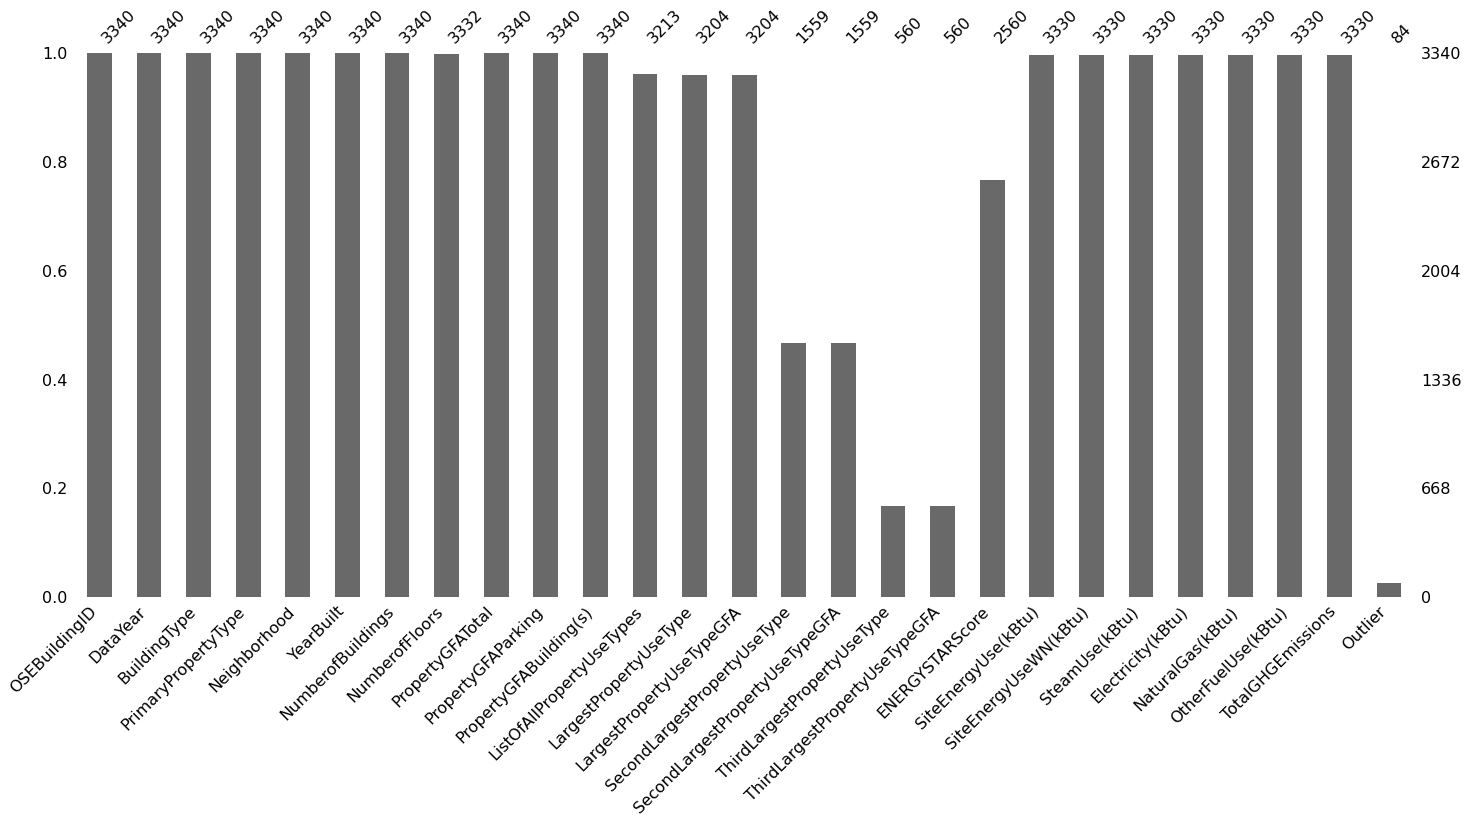

In [147]:
df2015 = raw_data[raw_data.DataYear==2015] 
msno.bar(df2015)

<AxesSubplot:>

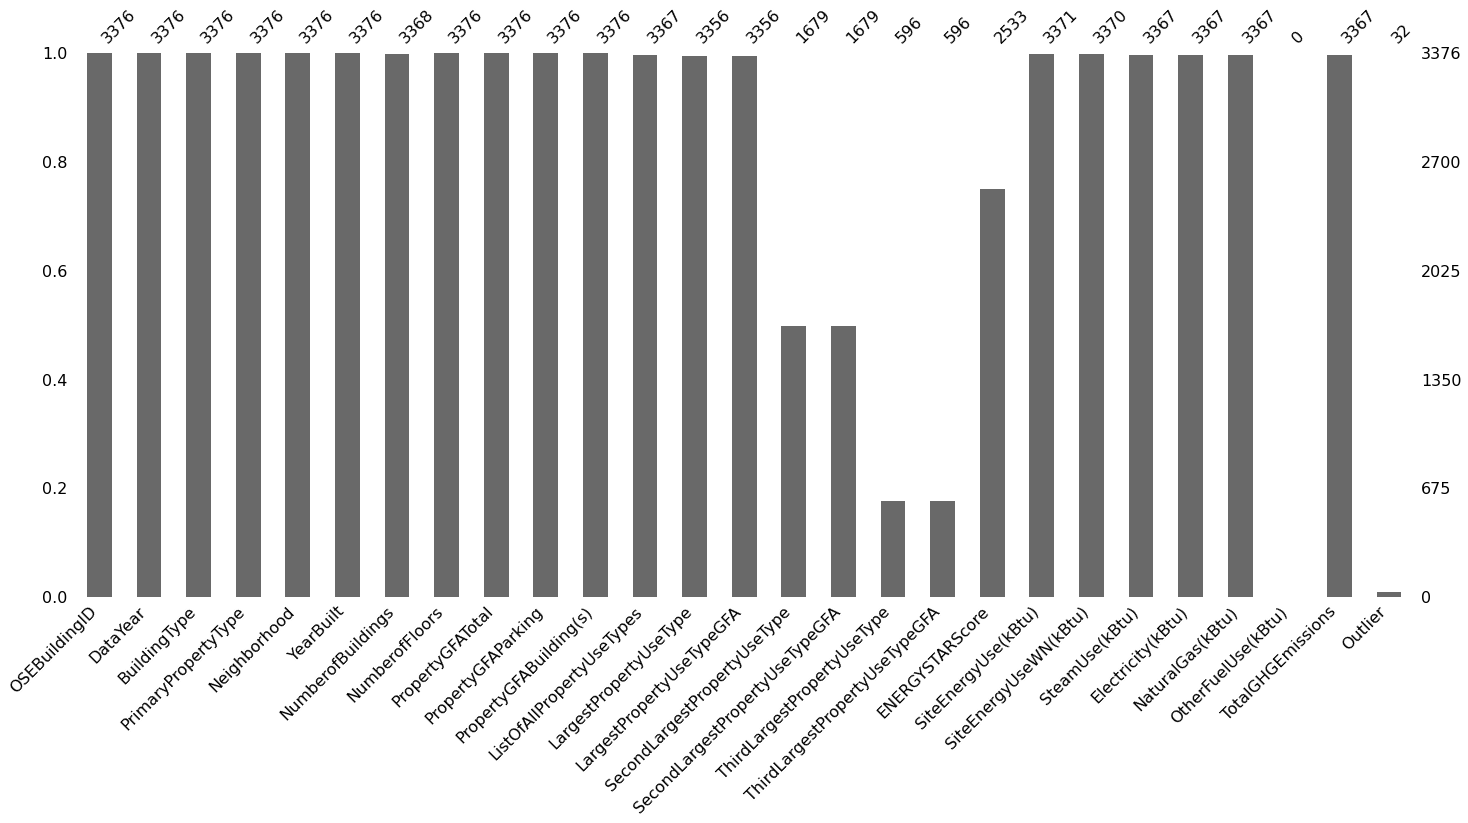

In [148]:
df2016 = raw_data[raw_data.DataYear==2016] 
msno.bar(df2016)

**ListofAllPropertyUseTypes, LargestPropertyUseType, SecondLargestPropertyUseType, ThirdLargestPropertyUseType**

In [149]:
raw_data[["ListOfAllPropertyUseTypes",
          "LargestPropertyUseType",
          "SecondLargestPropertyUseType", 
          "ThirdLargestPropertyUseType"]].sample(15)

,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
152,K-12 School,K-12 School,NaN,NaN
3061,K-12 School,K-12 School,NaN,NaN
3261,College/University,College/University,NaN,NaN
2420,Worship Facility,Worship Facility,NaN,NaN
2441,"Office, Retail Store",Office,Retail Store,NaN
3099,"Non-Refrigerated Warehouse, Office",Non-Refrigerated Warehouse,Office,NaN
1010,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,NaN,NaN
2062,Multifamily Housing,Multifamily Housing,NaN,NaN
781,"Multifamily Housing, Parking, Retail Store",Multifamily Housing,Retail Store,Parking
344,"Bank Branch, Office, Parking",Office,Parking,Bank Branch


**En utilisant get_dummies sur les variables SecondLargest... et ThirdLargest... on peut s'affranchir de NaN. Aucun autre traitement particulier à réaliser sur ces variables. En revanche, sur les variables quantitatives associées, on va remplacer les NaN par 0**

In [154]:
raw_data["SecondLargestPropertyUseTypeGFA"].fillna(0, inplace=True)
raw_data["ThirdLargestPropertyUseTypeGFA"].fillna(0, inplace=True)

**OtherFuelUse(kBtu)**

In [19]:
raw_data["OtherFuelUse(kBtu)"].describe()

count    3.330000e+03
mean     7.142301e+03
std      1.962790e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.269669e+06
Name: OtherFuelUse(kBtu), dtype: float64

<AxesSubplot:xlabel='OtherFuelUse(kBtu)', ylabel='Count'>

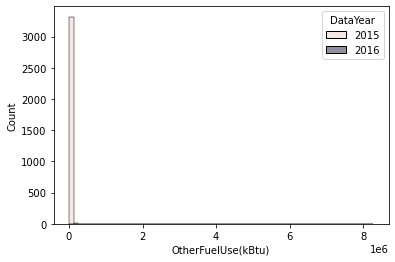

In [20]:
sns.histplot(data=raw_data, x="OtherFuelUse(kBtu)", hue="DataYear", bins=int(1+5*np.log2(raw_data.shape[0])))

In [21]:
print(raw_data["OtherFuelUse(kBtu)"].quantile(0.994))
print(raw_data["OtherFuelUse(kBtu)"].quantile(0.995))

0.0
194.18500000000995


On supprime la colonne "OtherFuelUse(kBtu)"

In [151]:
raw_data.drop(columns='OtherFuelUse(kBtu)', inplace=True)

<AxesSubplot:>

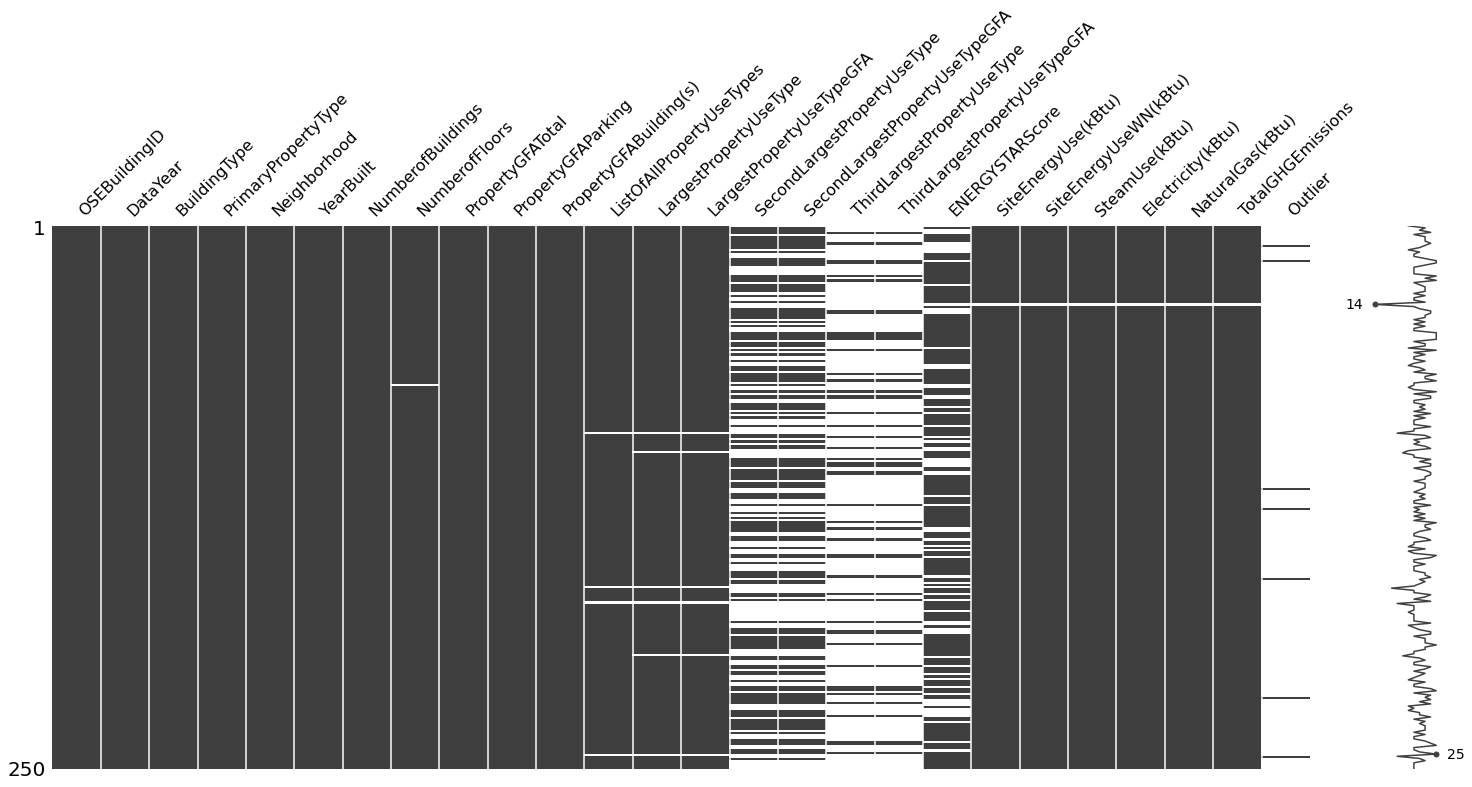

In [23]:
msno.matrix(raw_data.sample(250))

<AxesSubplot:>

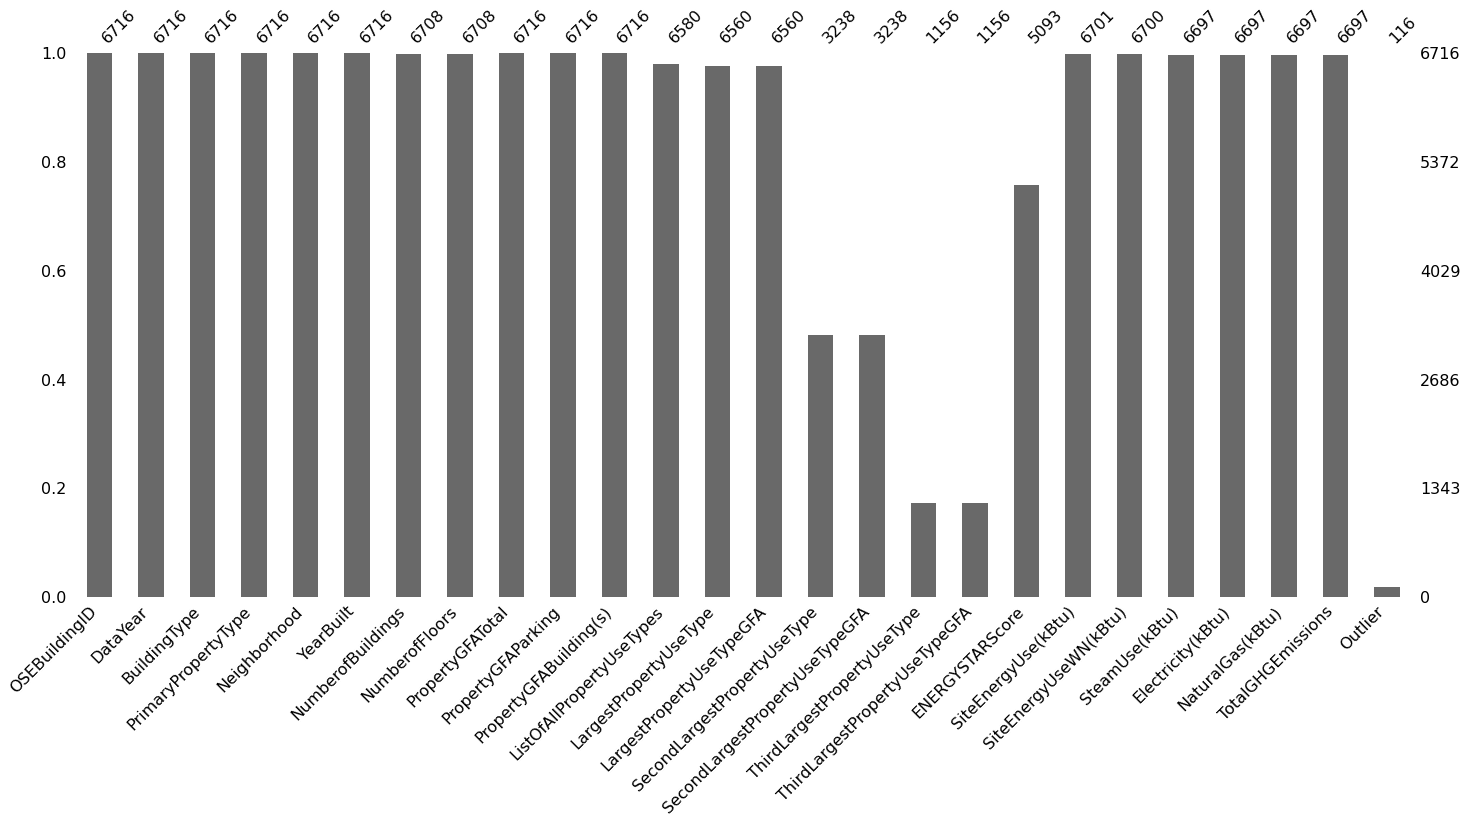

In [24]:
msno.bar(raw_data)

<AxesSubplot:>

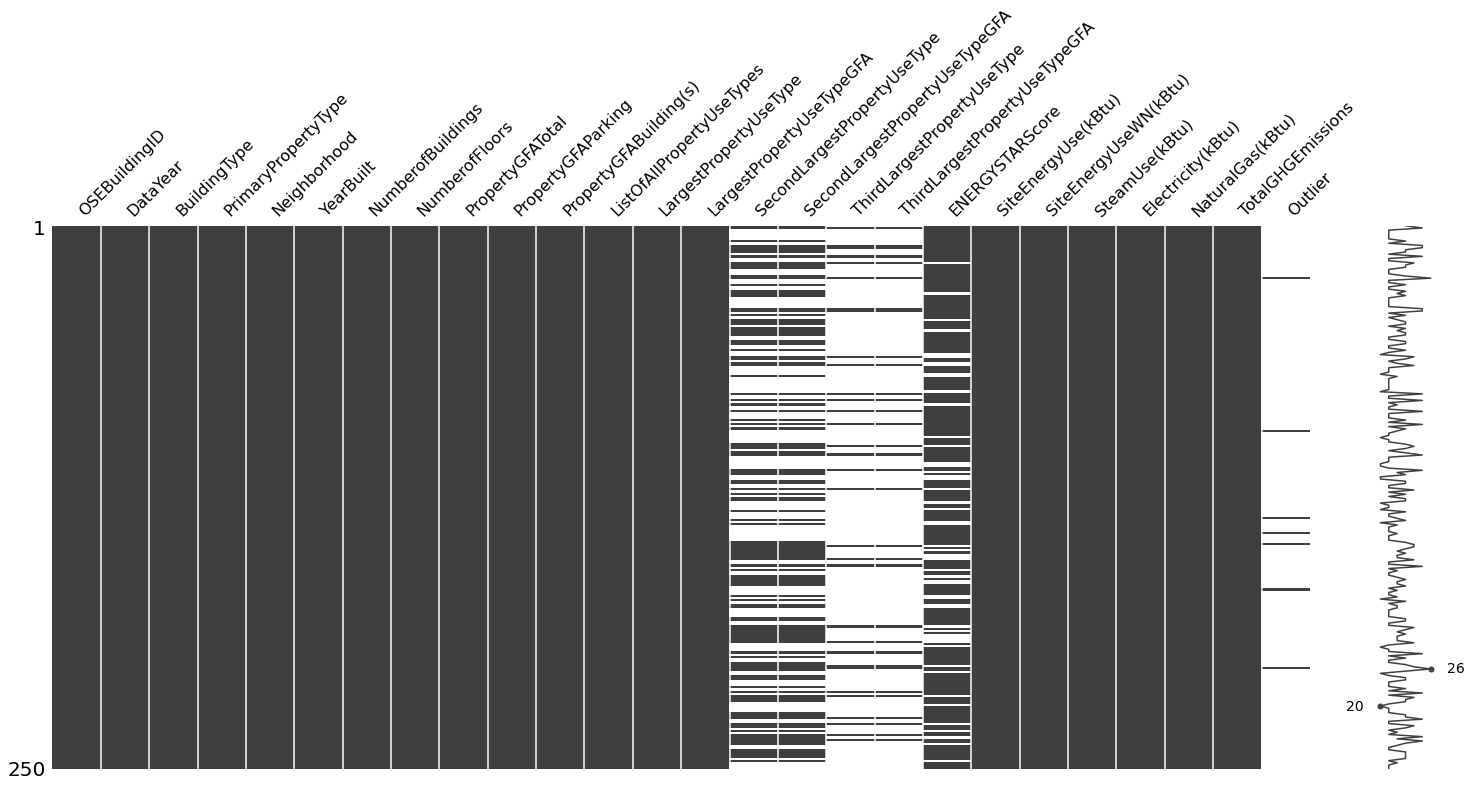

In [152]:
raw_data.dropna(subset=["ListOfAllPropertyUseTypes"], inplace=True)
raw_data.dropna(subset=["SiteEnergyUse(kBtu)", "TotalGHGEmissions"], how="any", inplace=True)
raw_data.dropna(subset=["LargestPropertyUseType"],inplace=True)
raw_data.dropna(subset=["NumberofBuildings", "NumberofFloors"], how="all", inplace=True)
msno.matrix(raw_data.sample(250))

<AxesSubplot:>

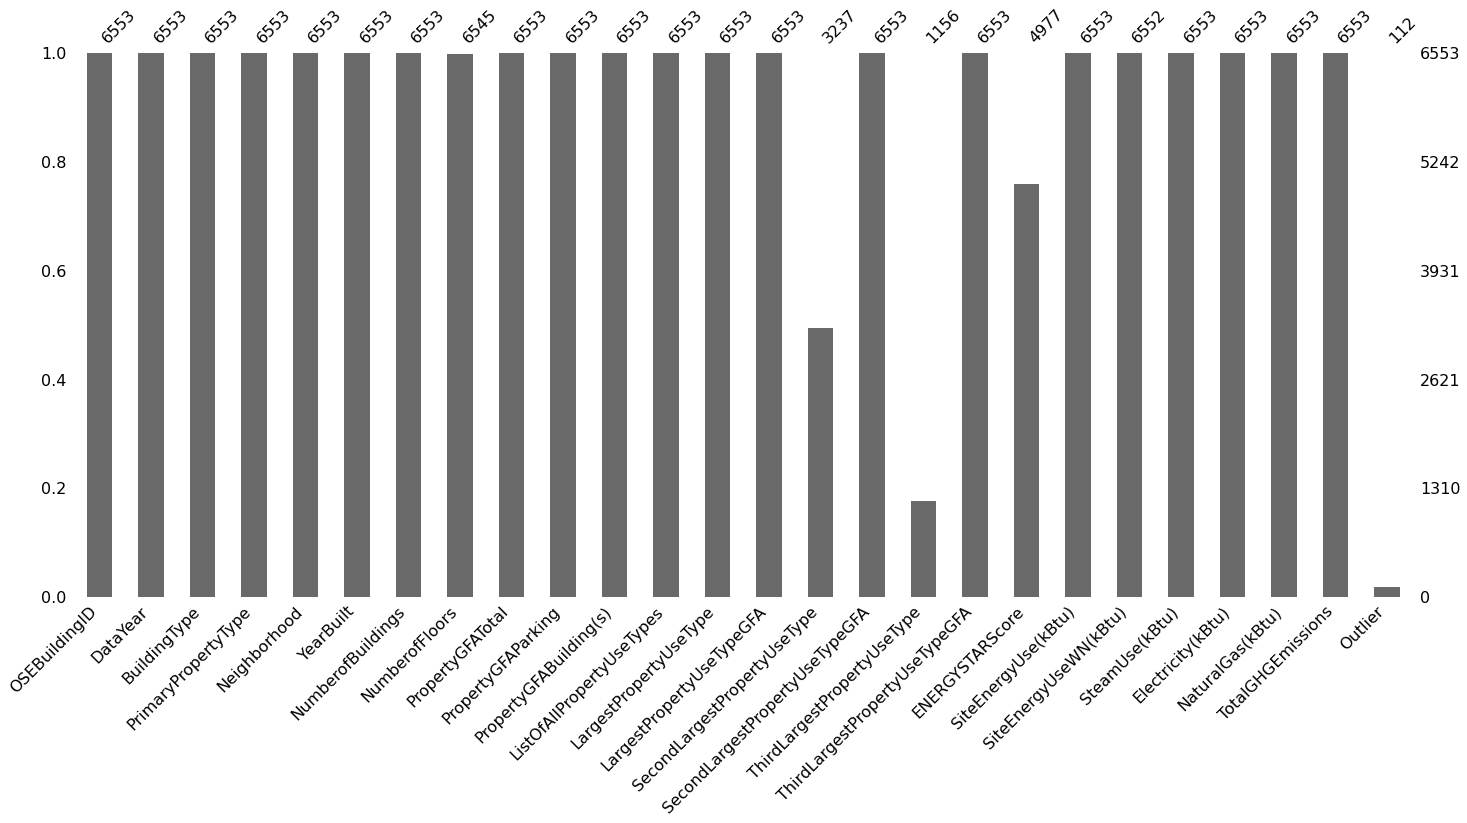

In [155]:
msno.bar(raw_data)

In [156]:
raw_data.to_csv("raw_data2.csv", index_label=False)

# II. Analyse exploratoire

In [79]:
raw_data = pd.read_csv("./raw_data2.csv")

## II.1 Variables qualitatives et variables quantitatives

In [80]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6560 entries, 0 to 3375
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6560 non-null   int64  
 1   DataYear                         6560 non-null   int64  
 2   BuildingType                     6560 non-null   object 
 3   PrimaryPropertyType              6560 non-null   object 
 4   Neighborhood                     6560 non-null   object 
 5   YearBuilt                        6560 non-null   int64  
 6   NumberofBuildings                6560 non-null   float64
 7   NumberofFloors                   6552 non-null   float64
 8   PropertyGFATotal                 6560 non-null   int64  
 9   PropertyGFAParking               6560 non-null   int64  
 10  PropertyGFABuilding(s)           6560 non-null   int64  
 11  ListOfAllPropertyUseTypes        6560 non-null   object 
 12  LargestPropertyUseTy

**On sépare le dataframe en deux: les colonnes numériques et les colonnes "object"**

In [81]:
mask = raw_data.dtypes!="object"
numerical_features = mask[mask].index
numerical_features

Index(['OSEBuildingID', 'DataYear', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions'],
      dtype='object')

In [82]:
mask = raw_data.dtypes=="object"
categorical_features = mask[mask].index
categorical_features

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'Outlier'],
      dtype='object')

**On retire les colonnes OSEBuildingID, DataYear, YearBuilt, qui sont des variables catégorielles en réalité**

In [172]:
num_categorical = pd.Index(["OSEBuildingID", 
                 "DataYear", 
                 "YearBuilt"
                           ])

In [173]:
# On récupère ces colonnes dans la liste des indicateurs catégoriels
categorical_features = categorical_features.append(num_categorical)
categorical_features

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'Outlier', 'OSEBuildingID', 'DataYear', 'YearBuilt', 'OSEBuildingID',
       'DataYear', 'YearBuilt'],
      dtype='object')

In [174]:
# On crée l'index quantitative_features qui ne contient que les variables quantitatives
quantitative_features = pd.Index([c for c in numerical_features if c not in categorical_features])
quantitative_features

Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions'],
      dtype='object')

## II.2 Variables quantitatives

On souhaite se passer des relevés annuels. On doit donc arriver à faire des prédictions sur les variables "targets" sans les variables "SiteEUI, SiteEUIWN, SourceEUI, SourceEUIWN, SiteEnergyUseWN, SteamUse, Electricity, NaturalGas, GHGEmissionsIntensity".

In [175]:
# On exclut les indicateurs liés à l'énergie consommée dans la liste des indicateurs quantitatifs
#quantitative_features = pd.Index(['NumberofBuildings',
#                    'NumberofFloors', 
#                    'PropertyGFATotal',
#                    'PropertyGFAParking',
#                    'PropertyGFABuilding(s)',
#                    'LargestPropertyUseTypeGFA'])
targets = pd.Index(["TotalGHGEmissions", "SiteEnergyUse(kBtu)"])

### II.2.1 Distribution des variables quantitatives

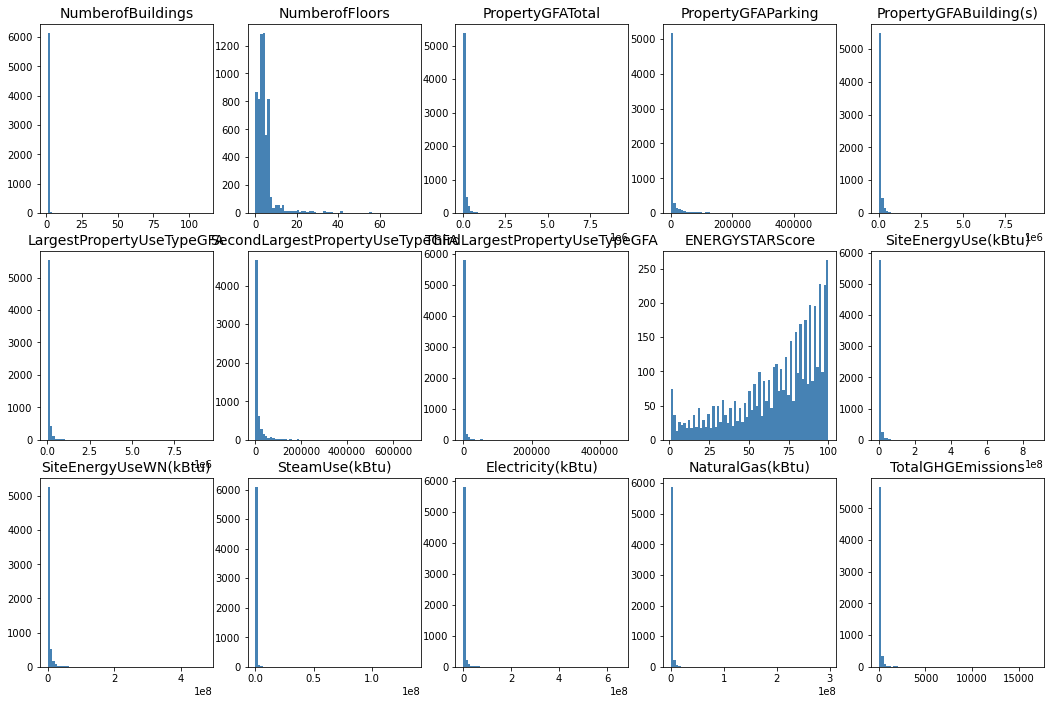

In [176]:
fig = plt.figure(figsize=(18, 16))
for feat_idx, feat in enumerate(quantitative_features):
    ax = fig.add_subplot(4,5, (feat_idx+1))
    h = ax.hist(raw_data[feat], bins=5*int(1+np.log2(raw_data.shape[0])), color = 'steelblue', density=False, edgecolor='none')
    ax.set_title(feat, fontsize=14)

Données très dispersées. Echelles très différentes d'une variable à l'autre. On a des outliers. On a également des valeurs à 0 (NumberofBuildings, TotalGHGEmission, LargestPropertyUseTypeGFA etc.) Surement des valeurs aberrantes.  On vérifie.

In [62]:
for feat in quantitative_features:
    print(raw_data[feat].describe(percentiles=[0.5]))
    print("-"*40)

count    6239.000000
mean        1.087193
std         1.638868
min         1.000000
50%         1.000000
max       111.000000
Name: NumberofBuildings, dtype: float64
----------------------------------------
count    6239.000000
mean        4.678634
std         5.276526
min         0.000000
50%         4.000000
max        76.000000
Name: NumberofFloors, dtype: float64
----------------------------------------
count    6.239000e+03
mean     9.314605e+04
std      1.912652e+05
min      1.128500e+04
50%      4.387800e+04
max      9.320156e+06
Name: PropertyGFATotal, dtype: float64
----------------------------------------
count      6239.000000
mean       9561.091040
std       34298.160874
min          -3.000000
50%           0.000000
max      512608.000000
Name: PropertyGFAParking, dtype: float64
----------------------------------------
count    6.239000e+03
mean     8.361505e+04
std      1.768139e+05
min      3.636000e+03
50%      4.208400e+04
max      9.320156e+06
Name: PropertyGFABuilding

Confirmation de l'observation précédente: valeurs aberrantes (surfaces négatives), très dispersées (std >= moyenne), présence probable d'outliers (max >> {moyenne, mediane}). Distribution non-normales.

### II.2.2 outliers

On utilise la colonne "Outlier"

In [87]:
raw_data["Outlier"].head()

0             NaN
1             NaN
2             NaN
3    High Outlier
4             NaN
Name: Outlier, dtype: object

In [88]:
raw_data["Outlier"].unique()

array([nan, 'High Outlier', 'Low Outlier', 'High outlier', 'Low outlier'],
      dtype=object)

In [162]:
raw_data["Outlier"].value_counts()

High Outlier    45
Low Outlier     35
Low outlier     23
High outlier     9
Name: Outlier, dtype: int64

In [163]:
# Pour la visualisation, on regroupe tous les outliers dans la catégorie "Yes", et les valeurs NaN dans "No"
outlier_yn = raw_data["Outlier"].where(raw_data["Outlier"].notna(), "No")
raw_data["Outlier_yn"] = outlier_yn

raw_data["Outlier_yn"] = raw_data["Outlier_yn"].apply(lambda x: "Yes" if x!="No" else x)

In [164]:
raw_data["Outlier_yn"].value_counts()

No     6223
Yes     112
Name: Outlier_yn, dtype: int64

In [165]:
# On corrige la valeur de PropertyGFABuilding(s)
m = raw_data["PropertyGFABuilding(s)"] <= 0
raw_data["PropertyGFABuilding(s)"].mask(m, -raw_data["PropertyGFABuilding(s)"], inplace=True)

# On retire les valeurs de TotalGHGEmissions et NumberofBuildings qui sont négatives ou nulles
d = raw_data.query("TotalGHGEmissions<=0 or NumberofBuildings<=0 or `SiteEnergyUse(kBtu)`==0").index
raw_data.drop(index=d, inplace=True)

In [166]:
# On exclut les outliers
raw_data = raw_data.loc[raw_data.Outlier_yn=="No"]
raw_data = raw_data[raw_data.NumberofFloors<80] # Il y a un bâtiment de 99 étages dont les émissions sont quasi-nulles

In [167]:
raw_data.Outlier_yn.value_counts()

No    6213
Name: Outlier_yn, dtype: int64

In [161]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6335 entries, 0 to 3375
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6335 non-null   int64  
 1   DataYear                         6335 non-null   int64  
 2   BuildingType                     6335 non-null   object 
 3   PrimaryPropertyType              6335 non-null   object 
 4   Neighborhood                     6335 non-null   object 
 5   YearBuilt                        6335 non-null   int64  
 6   NumberofBuildings                6335 non-null   float64
 7   NumberofFloors                   6327 non-null   float64
 8   PropertyGFATotal                 6335 non-null   int64  
 9   PropertyGFAParking               6335 non-null   int64  
 10  PropertyGFABuilding(s)           6335 non-null   int64  
 11  ListOfAllPropertyUseTypes        6335 non-null   object 
 12  LargestPropertyUseTy

In [168]:
# On supprime la colonne "Outlier"
raw_data.drop(columns="Outlier", inplace=True)

In [169]:
raw_data.index = pd.Index(range(0, raw_data.shape[0]))
raw_data.to_csv("./data.csv", index_label=False)
data = raw_data

## II.2.3 Transformation des variables cibles

On remplace les variables targets par leur log.

In [232]:
data = pd.read_csv("./data.csv")

In [233]:
data["SiteEnergyUse_log"] = data["SiteEnergyUse(kBtu)"].apply(np.log10)
data["TotalGHGEmissions_log"] = data["TotalGHGEmissions"].apply(np.log10)
targets = pd.Index(["SiteEnergyUse_log", "TotalGHGEmissions_log"])
quantitative_features = quantitative_features.append(pd.Index(["SiteEnergyUse_log", "TotalGHGEmissions_log"]))

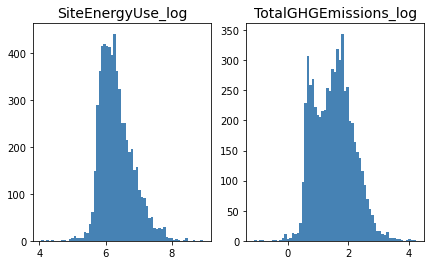

In [184]:
fig = plt.figure(figsize=(7, 4))
for feat_idx, feat in enumerate(targets):
    ax = fig.add_subplot(1,2, (feat_idx+1))
    h = ax.hist(data[feat], bins=5*int(1+np.log2(data.shape[0])), color = 'steelblue', density=False, edgecolor='none')
    ax.set_title(feat, fontsize=14)

Distribution clairement bi-modale pour TotalGHGEmissions

## II.2.4 Etude des corrélations

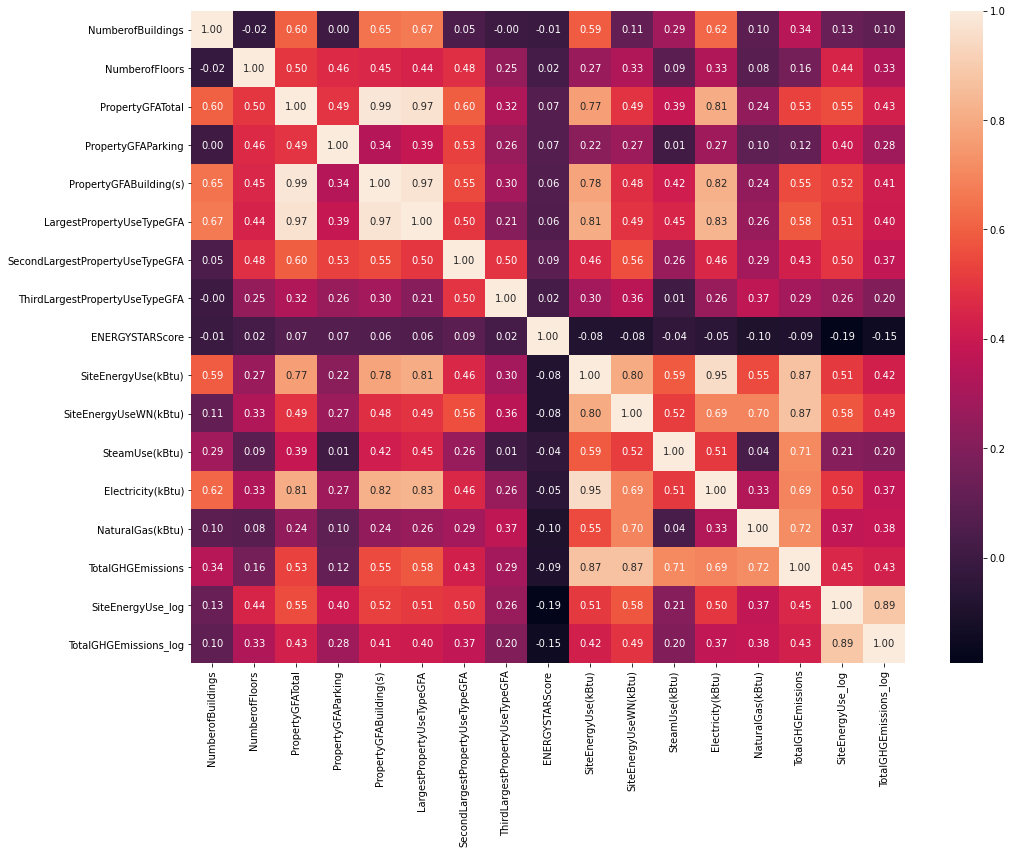

In [185]:
corr = data[quantitative_features].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

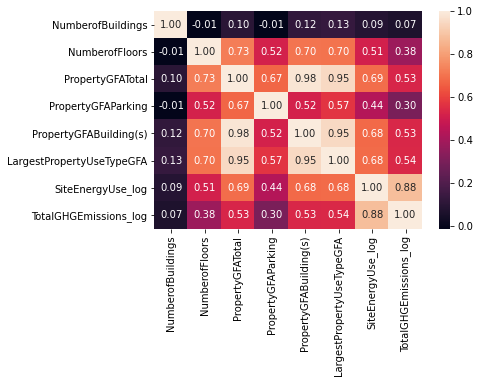

In [641]:
corr = data[quantitative_features.append(targets)].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

Globalement, corrélations plus fortes avec les log des cibles qu'avec les cibles elles-mêmes. Les cibles sont plus fortement corrélées (linéairement) entre elles que leur log - à explorer.
Enfin, SiteEnergyUse_log plus fortement corrélée avec les autres variables que TotalGHGEmissions: on va d'abord chercher à prédire SiteEnergyUse, puis on va chercher à prédire TotalGHGEmissions à partir de cette prédiction.

#### II.2.4.i Variables cibles

In [635]:
feats = ["TotalGHGEmissions", "SiteEnergyUse(kBtu)"]
feats_log = ["TotalGHGEmissions_log", "SiteEnergyUse_log"]

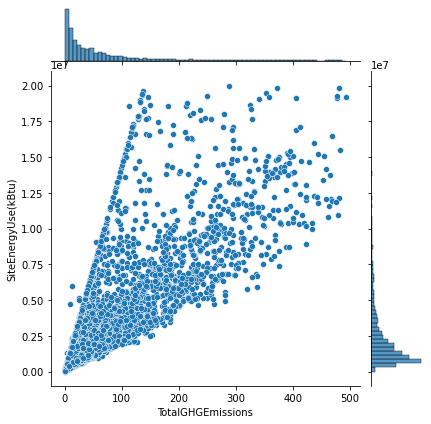

In [224]:
# jointplot sans les outliers pour une meilleure visualisation
sns.jointplot(data=data.query("TotalGHGEmissions<500 and `SiteEnergyUse(kBtu)`<2e7"), x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)")
plt.show()

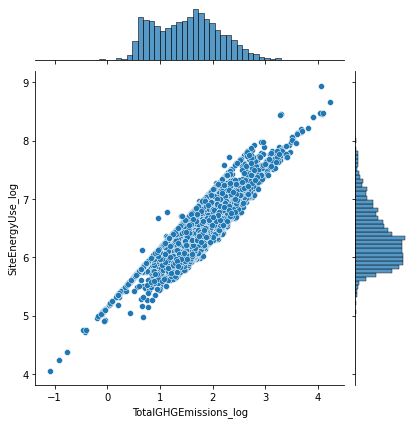

In [225]:
sns.jointplot(data=data, x="TotalGHGEmissions_log", y="SiteEnergyUse_log")
plt.show()

#### II.2.4.ii Prédicteurs

On a de fortes corrélations entre les variables "PropertyGFATotal", "PropertyGFABuilding(s)", "LargestPropertyUseTypeGFA".

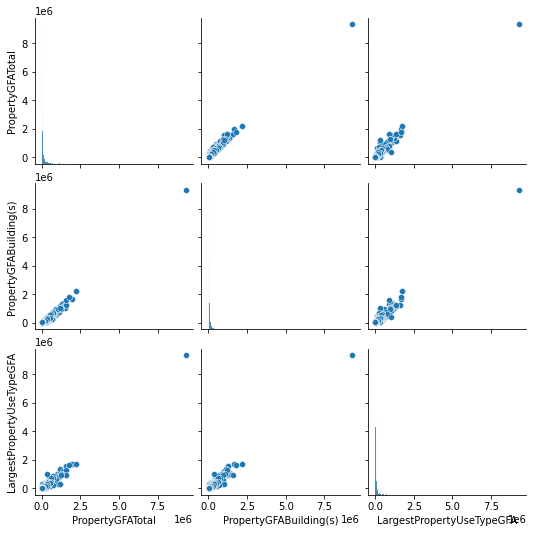

In [96]:
sns.pairplot(data, vars=["PropertyGFATotal", "PropertyGFABuilding(s)", "LargestPropertyUseTypeGFA"])
plt.show()

PropertyGFATotal somme de PropertyGFAParking et PropertyGFABuilding(s) ?

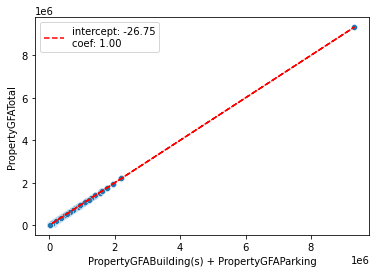

In [97]:
sum_pgfa = data.loc[:, ["PropertyGFABuilding(s)", "PropertyGFAParking"]].apply(np.sum, axis=1)
tot_pgfa = data.PropertyGFATotal

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X = sum_pgfa.to_numpy().reshape(-1, 1)
y = tot_pgfa.to_numpy()

lr.fit(X, y)

sns.scatterplot(x=sum_pgfa, y=tot_pgfa)
plt.plot(sum_pgfa, lr.intercept_ + sum_pgfa*lr.coef_, linestyle="--", color="r", label="intercept: {:.2f}\ncoef: {:.2f}".format(lr.intercept_, lr.coef_[0]))
plt.legend()
plt.xlabel("PropertyGFABuilding(s) + PropertyGFAParking")
plt.show()

$\rightarrow$ On n'utilisera pas PropertyGFATotal

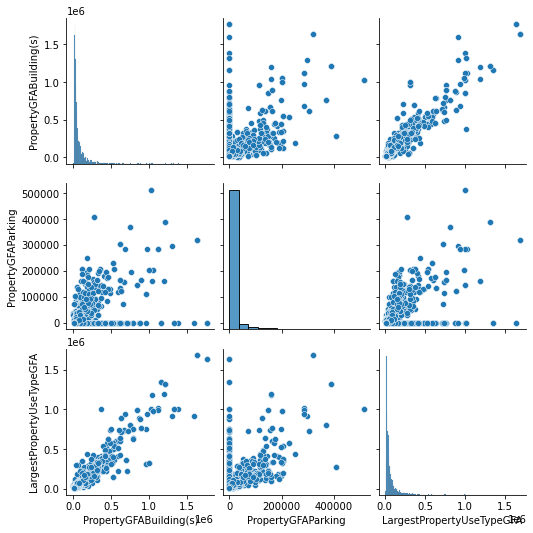

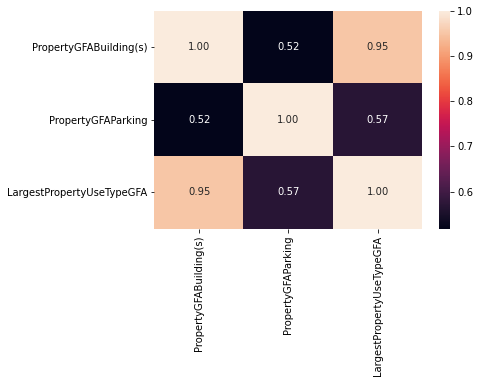

In [555]:
feats = ["PropertyGFABuilding(s)", "PropertyGFAParking", "LargestPropertyUseTypeGFA"]

sns.pairplot(data, vars=feats)
plt.show()

sns.heatmap(data[feats].corr(), annot=True, fmt=".2f")
plt.show()

* Forte corrélation entre LargestUseTypeGFA et PropertyGFABuilding(s). A traiter et/ou mettre à contribution lors de l'apprentissage.

* NumberofBuildings largement dominée par les entités comprenant 1 ou 2 bâtiments.

* Pour la variable NumberofBuildings, on va plutôt afficher les diagrammes en boîte.

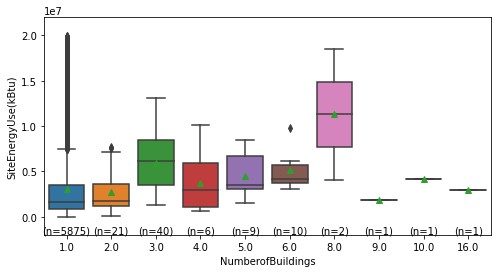

In [98]:
d = data.query("`SiteEnergyUse(kBtu)`<2e7")

# affichage des effectifs de chaque classe
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(x="NumberofBuildings", y="SiteEnergyUse(kBtu)", data=d, ax=ax, showfliers=True, showmeans=True)
ax.set_ylim([-0.2e7, 2.2e7])
for pos, g in enumerate(d["NumberofBuildings"].unique()):
    y= d["SiteEnergyUse(kBtu)"].quantile(0.75)
    ax.text(pos, -1e6,"(n={})".format(d[d["NumberofBuildings"]==g].shape[0]),horizontalalignment='center',verticalalignment='top')
plt.show()

Passage au log, pas d'exclusion des outliers

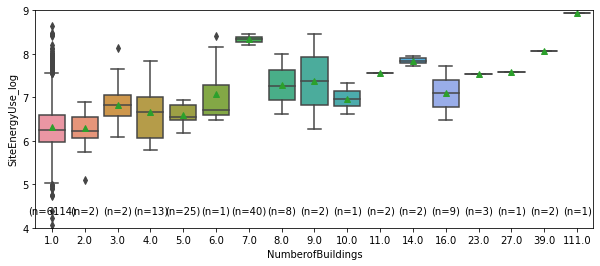

In [100]:
# affichage des effectifs de chaque classe
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x="NumberofBuildings", y="SiteEnergyUse_log", data=data, ax=ax, showfliers=True, showmeans=True)
ax.set_ylim([4, 9])
for pos, g in enumerate(data["NumberofBuildings"].unique()):
    y= data.loc[data["NumberofBuildings"]==g, "SiteEnergyUse_log"].quantile(0.75)
    ax.text(pos, 4.5,"(n={})".format(data[data["NumberofBuildings"]==g].shape[0]),horizontalalignment='center',verticalalignment='top')
plt.show()

## II.3 Variables catégorielles

### II.3.1 Tour d'horizon des variables catégorielles

In [76]:
cat_feats = pd.DataFrame(data={"nombre de modalités":data[categorical_features].nunique()})
cat_feats

,nombre de modalités
BuildingType,8
PrimaryPropertyType,31
Neighborhood,19
ListOfAllPropertyUseTypes,478
LargestPropertyUseType,57
SecondLargestPropertyUseType,50
ThirdLargestPropertyUseType,43
Outlier_yn,1
OSEBuildingID,3353
DataYear,2


Variables d'intérêt: DataYear, BuildingType, PrimaryPropertyType, LargestPropertyUseType, YearBuilt, ListOfAllPropertyUseTypes

In [39]:
data.BuildingType.head()

0    NonResidential
1    NonResidential
2    NonResidential
3    NonResidential
4    NonResidential
Name: BuildingType, dtype: object

In [40]:
data.LargestPropertyUseType.head()

0    Hotel
1    Hotel
2    Hotel
3    Hotel
4    Hotel
Name: LargestPropertyUseType, dtype: object

In [41]:
data.PrimaryPropertyType.head()

0    Hotel
1    Hotel
2    Hotel
3    Hotel
4    Hotel
Name: PrimaryPropertyType, dtype: object

In [42]:
data.YearBuilt.head()

0    1927
1    1996
2    1969
3    1926
4    1980
Name: YearBuilt, dtype: int64

In [325]:
data.ListOfAllPropertyUseTypes

0                               Hotel
1          Hotel, Parking, Restaurant
2       Hotel, Parking, Swimming Pool
3       Hotel, Parking, Swimming Pool
4                               Hotel
                    ...              
4770     Multifamily Housing, Parking
4771              Multifamily Housing
4772                           Office
4773                           Office
4774                           Office
Name: ListOfAllPropertyUseTypes, Length: 4775, dtype: object

Doublons entre LargestPropertyUseType et PrimaryPropertyType?

In [43]:
data.LargestPropertyUseType.unique()

array(['Hotel', 'Multifamily Housing', 'Courthouse', 'K-12 School',
       'Self-Storage Facility', 'Office', 'Senior Care Community',
       'Retail Store', 'Hospital (General Medical & Surgical)',
       'Residence Hall/Dormitory', 'Financial Office',
       'Non-Refrigerated Warehouse', 'Worship Facility', 'Medical Office',
       'Supermarket/Grocery Store', 'Parking', 'Distribution Center',
       'Wholesale Club/Supercenter', 'Refrigerated Warehouse',
       'Data Center', 'Other - Public Services', 'Bank Branch',
       'Laboratory', 'Manufacturing/Industrial Plant',
       'Other - Restaurant/Bar', 'Other'], dtype=object)

In [326]:
data.PrimaryPropertyType.unique()

array(['Hotel', 'Mid-Rise Multifamily', 'Other', 'K-12 School',
       'Self-Storage Facility\n', 'Small- and Mid-Sized Office',
       'Large Office', 'Low-Rise Multifamily', 'Senior Care Community',
       'Retail Store', 'Hospital', 'Residence Hall/Dormitory',
       'Non-Refrigerated Warehouse', 'Worship Facility', 'Medical Office',
       'Supermarket/Grocery Store', 'Mixed Use Property',
       'Distribution Center', 'Refrigerated Warehouse',
       'High-Rise Multifamily', 'Residence Hall', 'Warehouse', 'Office'],
      dtype=object)

Sans doute des doublons. On va fusionner ces deux variables, et ne garder que les modalités uniques. On peut regarder les corrélations entre les modalités.

### II.3.2 Etude des corrélations

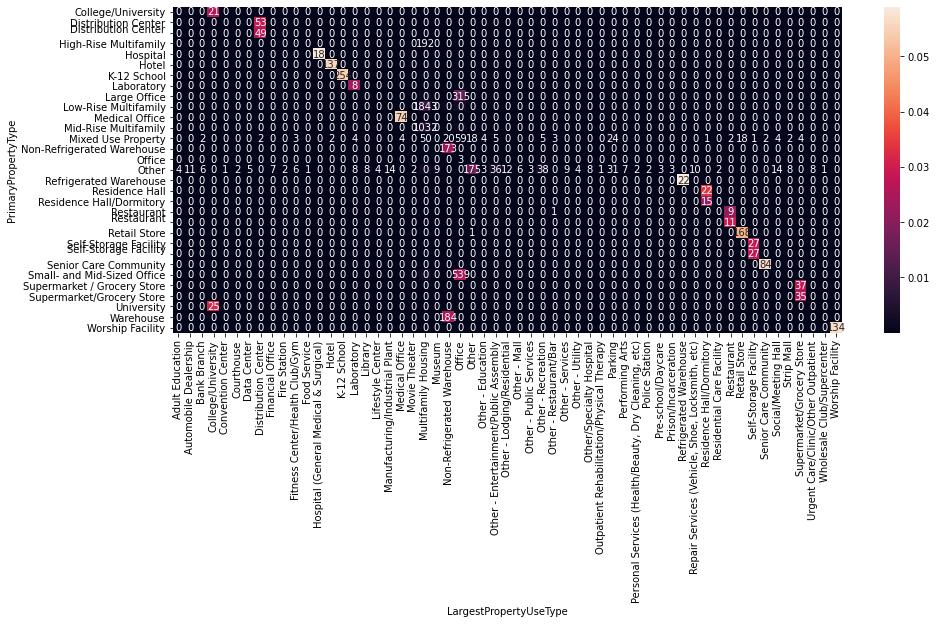

In [101]:
def contingence(Var1, Var2, df):
    X=Var1
    Y=Var2
    cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

    tx = cont.loc[:,["Total"]]
    ty = cont.loc[["Total"],:]
    n = len(df)
    indep = tx.dot(ty) / n

    c = cont.fillna(0) # On remplace les valeurs nulles par 0
    measure = (c-indep)**2/indep
    xi_n = measure.sum().sum()
    table = measure/xi_n
    plt.figure(figsize=(15, 6))
    sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], fmt=".0f")
    
    return xi_n

xi = contingence("PrimaryPropertyType", "LargestPropertyUseType", data)

Les variables PrimaryPropertyType et LargestPropertyUseType sont très semblables. Il y a deux modalités associées à "Distribution Center" dans la variable PrimaryPropertyType?

In [277]:
data["PrimaryPropertyType"].unique()

array(['Hotel', 'Mid-Rise Multifamily', 'Other', 'K-12 School',
       'Self-Storage Facility\n', 'Small- and Mid-Sized Office',
       'Large Office', 'Low-Rise Multifamily', 'Senior Care Community',
       'Retail Store', 'Hospital', 'Residence Hall/Dormitory',
       'Non-Refrigerated Warehouse', 'Worship Facility', 'Medical Office',
       'Supermarket/Grocery Store', 'Mixed Use Property',
       'Distribution Center\n', 'Refrigerated Warehouse',
       'High-Rise Multifamily', 'Residence Hall', 'Warehouse',
       'Supermarket / Grocery Store', 'Distribution Center', 'Office'],
      dtype=object)

On corrige... On en profite pour corriger aussi les deux "fausses" modalités associées à "Supermarket/Grocery Store"

In [102]:
data["PrimaryPropertyType"] = data["PrimaryPropertyType"].apply(lambda x: "Distribution Center" 
                                                             if "Distribution Center" in x else x)

data["PrimaryPropertyType"] = data["PrimaryPropertyType"].apply(lambda x: "Supermarket/Grocery Store"
                                 if "Grocery Store" in x else x)

data["PrimaryPropertyType"] = data["PrimaryPropertyType"].apply(lambda x: "Self-Storage Facility"
                                                               if "Self-Storage" in x else x)

#data["PrimaryPropertyType"] = data["PrimaryPropertyType"].apply(lambda x: "Non-Refrigerated Warehouse"
#                                                               if x=="Warehouse" else x)

data["PrimaryPropertyType"] = data["PrimaryPropertyType"].apply(lambda x: "Restaurant"
                                                               if "Restaurant" in x else x)

Residence Hall vs Residence Hall/Dormitory?

In [110]:
print(data.loc[data.DataYear==2015, "PrimaryPropertyType"].unique())
print(data.loc[data.DataYear==2016, "PrimaryPropertyType"].unique())

['Hotel' 'Other' 'Mid-Rise Multifamily' 'Mixed Use Property' 'K-12 School'
 'College/University' 'Small- and Mid-Sized Office'
 'Self-Storage Facility' 'Large Office' 'Low-Rise Multifamily'
 'Senior Care Community' 'Retail Store' 'Hospital'
 'Residence Hall/Dormitory' 'Non-Refrigerated Warehouse'
 'Distribution Center' 'Worship Facility' 'Medical Office'
 'Supermarket/Grocery Store' 'Refrigerated Warehouse'
 'High-Rise Multifamily' 'Restaurant']
['Hotel' 'Other' 'Mid-Rise Multifamily' 'Mixed Use Property' 'K-12 School'
 'University' 'Small- and Mid-Sized Office' 'Self-Storage Facility'
 'Warehouse' 'Senior Care Community' 'Retail Store' 'Large Office'
 'Hospital' 'Residence Hall/Dormitory' 'Distribution Center'
 'Worship Facility' 'Low-Rise Multifamily' 'Medical Office'
 'Supermarket/Grocery Store' 'Laboratory' 'Refrigerated Warehouse'
 'Restaurant' 'High-Rise Multifamily' 'Office']


Il semble que Residence Hall et Residence Hall/Dormitory représentent la même chose. Comment le confirmer?

On va grouper les YearBuilt par décennies, et regarder la distribution de chacune de ces variables, ainsi que de la variable Residence Hall/Dormitory provenant de LArgestPropertyUseType sur les différentes décennies.

In [104]:
nb_decennies = 1+(data.YearBuilt.max()-data.YearBuilt.min())//10
bins = [1900+i*10 for i in range(nb_decennies)]
yb_grouped = np.digitize(data.YearBuilt, bins)
yb_grouped = pd.Series(data=yb_grouped, name="yb_grouped")

2418.829220992354

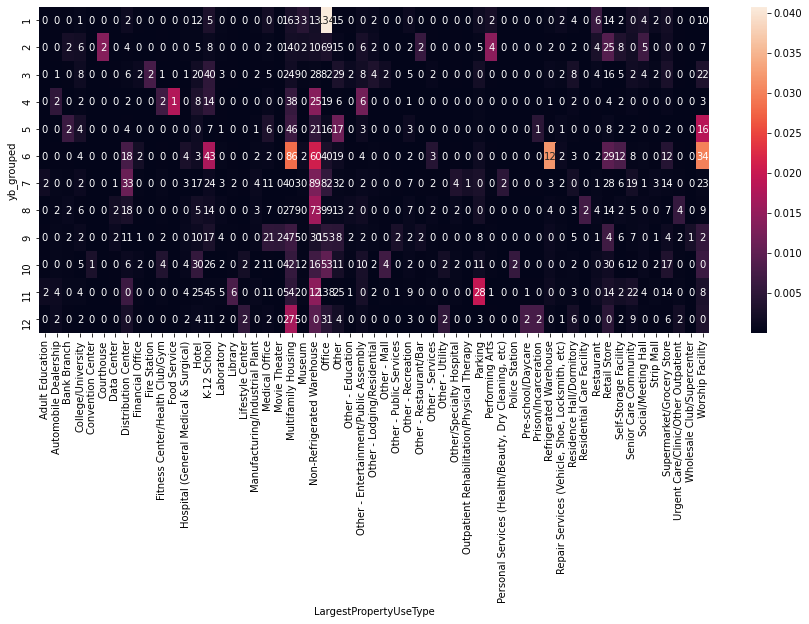

In [105]:
df = pd.concat([data, yb_grouped], axis=1)
contingence("yb_grouped", "LargestPropertyUseType", df)

1881.7185014169527

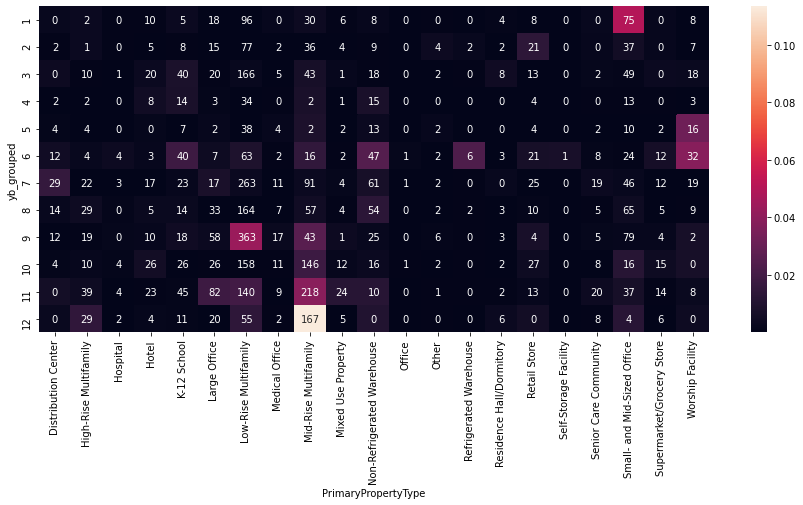

In [851]:
contingence("yb_grouped", "PrimaryPropertyType", df)

La colonne "Residence Hall/Dormitory" provenant de LargestPropertyUseType est exactement égale à la somme des colonnes Residence Hall et Residence Hall/Dormitory provenant de PrimaryPropertyType. Cela confirme que Residence Hall et Residence Hall/Dormitory représentent la même chose.

In [111]:
# On regroupe TotalGHGEmissions en 10 catégories
deciles = data["SiteEnergyUse_log"].describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# On groupe TotalGHGEmissions en 10 catégories
bins = deciles[4:-1].to_numpy()
cat_SEUlog = np.digitize(data.SiteEnergyUse_log, bins)

# Création d'une Series pour pouvoir concatener
cat_SEUlog = pd.Series(data=cat_SEUlog, name="cat_SEUlog", index=range(0, cat_SEUlog.shape[0]))

In [112]:
# On regroupe TotalGHGEmissions en 10 catégories
deciles = data["TotalGHGEmissions_log"].describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# On groupe TotalGHGEmissions en 10 catégories
bins = deciles[4:-1].to_numpy()
cat_TotGHGlog = np.digitize(data["TotalGHGEmissions_log"], bins)

# Création d'une Series pour pouvoir concatener
cat_TotGHGlog = pd.Series(data=cat_TotGHGlog, name="cat_TotGHGlog", index=range(0, cat_TotGHGlog.shape[0]))

629.6262499837992

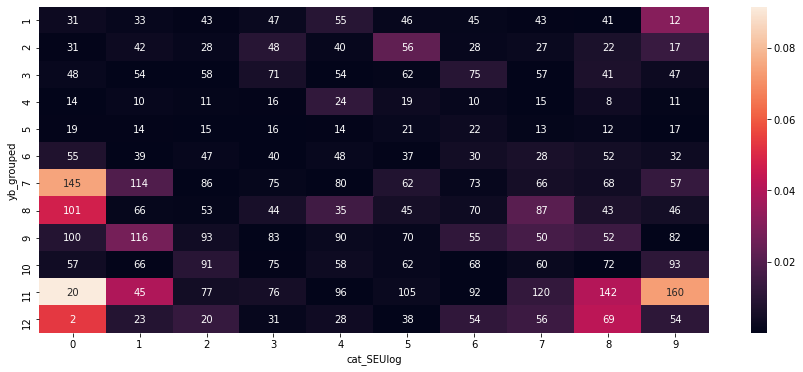

In [113]:
df1 = pd.concat([df, cat_SEUlog, cat_TotGHGlog], axis=1)
contingence("yb_grouped", "cat_SEUlog", df1)

954.9505137232786

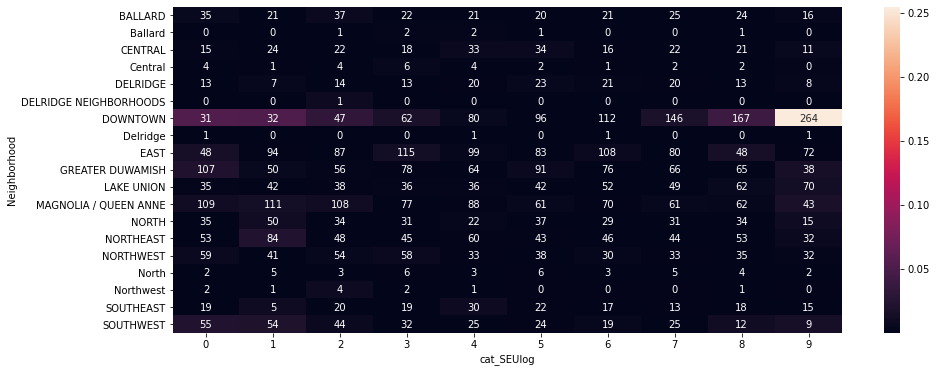

In [114]:
contingence("Neighborhood", "cat_SEUlog", df1)

854.6516066255981

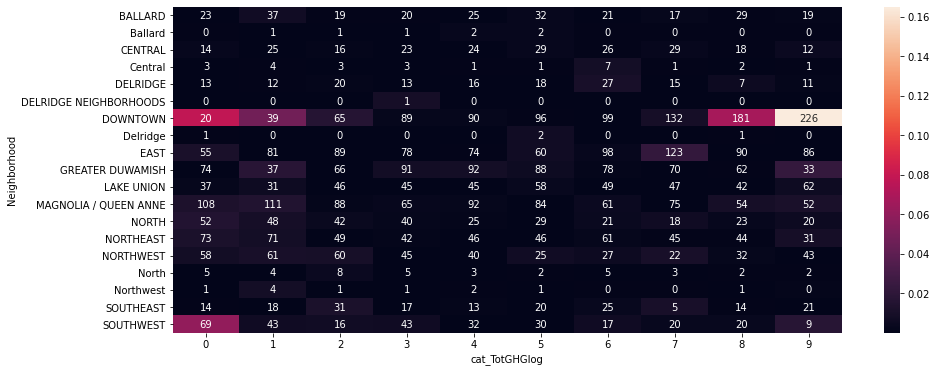

In [115]:
contingence("Neighborhood", "cat_TotGHGlog", df1)

5807.619784265926

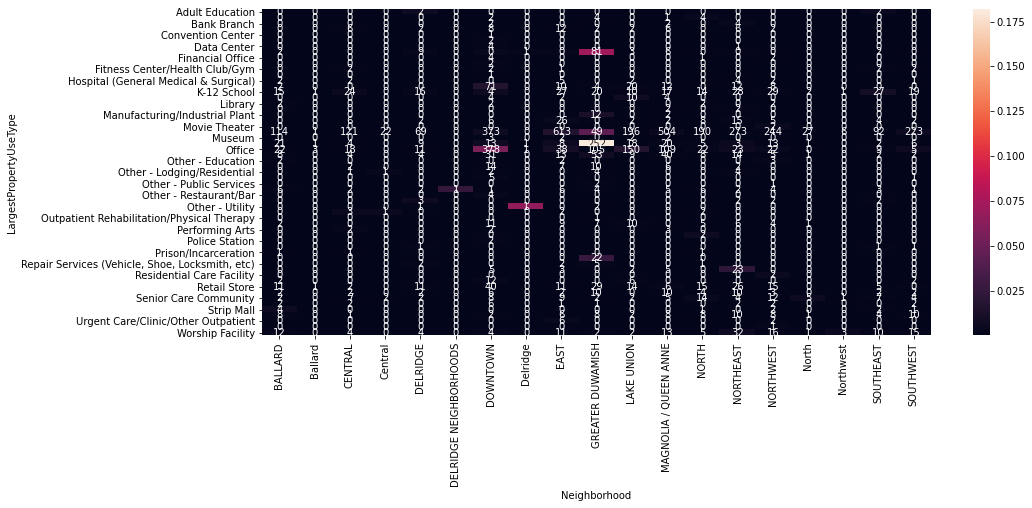

In [116]:
contingence("LargestPropertyUseType", "Neighborhood", df1)

387.4458996796185

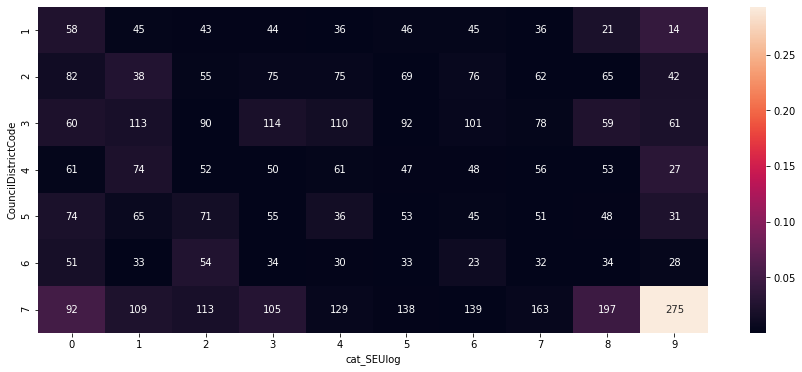

In [899]:
contingence("CouncilDistrictCode", "cat_SEUlog", df1)

**Nettoyage**

In [107]:
data["PrimaryPropertyType"] = data["PrimaryPropertyType"].apply(lambda x: "Residence Hall/Dormitory"
                                 if "Residence Hall" in x else x)

On peut maintenant fusionner les modalités identiques. Pour cela, on va One-hot encoder les deux variables, "LargestPropertyUseType" et "PrimaryPropertyType", puis retirer les colonnes en double.

104922.45081919475

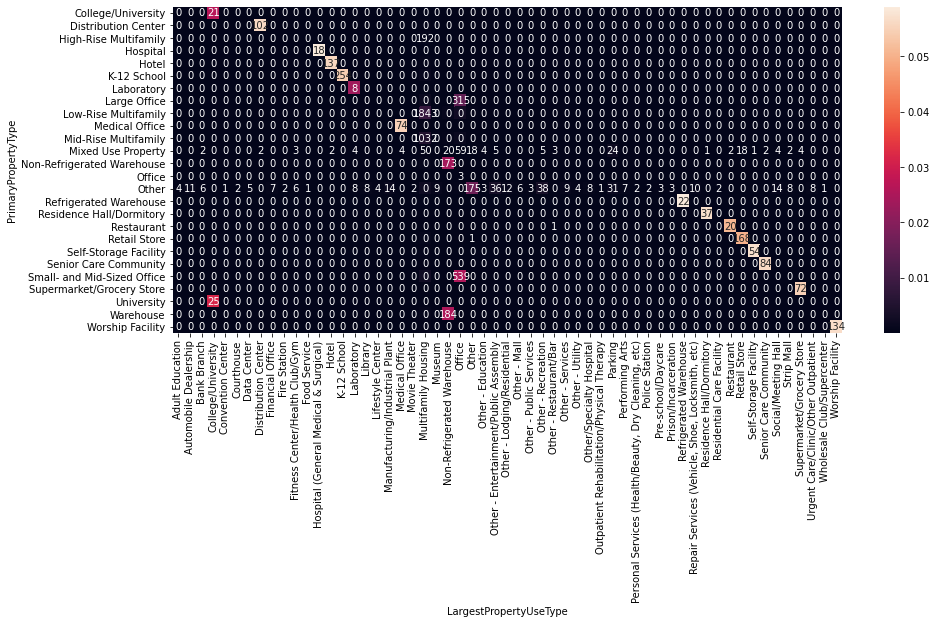

In [108]:
contingence("PrimaryPropertyType", "LargestPropertyUseType", data)

In [704]:
largestptype = pd.get_dummies(data.LargestPropertyUseType, prefix="largest")
primaryptype = pd.get_dummies(data.PrimaryPropertyType, prefix="primary")

ptype = pd.concat([largestptype, primaryptype], axis=1)

In [705]:
pd.Series(ptype.columns)

0                               largest_Bank Branch
1                                largest_Courthouse
2                               largest_Data Center
3                       largest_Distribution Center
4                          largest_Financial Office
5     largest_Hospital (General Medical & Surgical)
6                                     largest_Hotel
7                               largest_K-12 School
8                                largest_Laboratory
9            largest_Manufacturing/Industrial Plant
10                           largest_Medical Office
11                      largest_Multifamily Housing
12               largest_Non-Refrigerated Warehouse
13                                   largest_Office
14                                    largest_Other
15                  largest_Other - Public Services
16                   largest_Other - Restaurant/Bar
17                                  largest_Parking
18                   largest_Refrigerated Warehouse
19          

In [679]:
ptypes = ptype.T.drop_duplicates().T

In [693]:
pd.Series(ptypes.columns)

0                               largest_Bank Branch
1                                largest_Courthouse
2                               largest_Data Center
3                       largest_Distribution Center
4                          largest_Financial Office
5     largest_Hospital (General Medical & Surgical)
6                                     largest_Hotel
7                               largest_K-12 School
8                                largest_Laboratory
9            largest_Manufacturing/Industrial Plant
10                           largest_Medical Office
11                      largest_Multifamily Housing
12               largest_Non-Refrigerated Warehouse
13                                   largest_Office
14                                    largest_Other
15                  largest_Other - Public Services
16                   largest_Other - Restaurant/Bar
17                                  largest_Parking
18                   largest_Refrigerated Warehouse
19          

In [529]:
#ptypes.drop(columns=["largest_Multifamily Housing", "primary_Office", "primary_Other"], inplace=True)
#ptypes.head()

,largest_Bank Branch,largest_Courthouse,largest_Data Center,largest_Distribution Center,largest_Financial Office,largest_Hospital (General Medical & Surgical),largest_Hotel,largest_K-12 School,largest_Laboratory,largest_Manufacturing/Industrial Plant,...,primary_Distribution Center,primary_High-Rise Multifamily,primary_Large Office,primary_Low-Rise Multifamily,primary_Mid-Rise Multifamily,primary_Mixed Use Property,primary_Non-Refrigerated Warehouse,primary_Retail Store,primary_Senior Care Community,primary_Small- and Mid-Sized Office
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [874]:
data_ptypes_yb = pd.concat([data, ptypes, yb_grouped], axis=1)

In [875]:
data_ptypes_yb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4775 entries, 0 to 4774
Data columns (total 81 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   OSEBuildingID                                  4775 non-null   int64  
 1   DataYear                                       4775 non-null   int64  
 2   BuildingType                                   4775 non-null   object 
 3   PrimaryPropertyType                            4775 non-null   object 
 4   PropertyName                                   4775 non-null   object 
 5   TaxParcelIdentificationNumber                  4775 non-null   object 
 6   Latitude                                       4775 non-null   float64
 7   Longitude                                      4775 non-null   float64
 8   Address                                        4775 non-null   object 
 9   City                                           4775 

In [876]:
data_ptypes_yb.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Latitude,Longitude,Address,City,...,primary_Low-Rise Multifamily,primary_Mid-Rise Multifamily,primary_Mixed Use Property,primary_Non-Refrigerated Warehouse,primary_Office,primary_Other,primary_Retail Store,primary_Senior Care Community,primary_Small- and Mid-Sized Office,yb_grouped
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,47.612190,-122.337997,405 OLIVE WAY,SEATTLE,...,0,0,0,0,0,0,0,0,0,3
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,47.613106,-122.333358,724 PINE ST,SEATTLE,...,0,0,0,0,0,0,0,0,0,10
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,47.613349,-122.337699,1900 5TH AVE,SEATTLE,...,0,0,0,0,0,0,0,0,0,7
3,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,47.613754,-122.340924,401 LENORA ST,SEATTLE,...,0,0,0,0,0,0,0,0,0,9
4,10,2015,NonResidential,Hotel,CAMLIN WORLDMARK HOTEL,660000825,47.614114,-122.332741,1619 9TH AVE,SEATTLE,...,0,0,0,0,0,0,0,0,0,3


In [877]:
data_ptypes_yb.to_csv("./data_ptypes_yb.csv", index_label=False)

In [234]:
data.to_csv("./data.csv", index_label=False)

# III Modèles
## III.1 Régressions Linéaires

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config

set_config(display='diagram')

In [235]:
#data=pd.read_csv("./data.csv")
#data = pd.read_csv("./data_ptypes_yb.csv")
#data.drop(columns=["LargestPropertyUseType", "PrimaryPropertyType", "PropertyGFATotal",
                   #"YearBuilt"
#                  ], inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6213 entries, 0 to 6212
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6213 non-null   int64  
 1   DataYear                         6213 non-null   int64  
 2   BuildingType                     6213 non-null   object 
 3   PrimaryPropertyType              6213 non-null   object 
 4   Neighborhood                     6213 non-null   object 
 5   YearBuilt                        6213 non-null   int64  
 6   NumberofBuildings                6213 non-null   float64
 7   NumberofFloors                   6213 non-null   float64
 8   PropertyGFATotal                 6213 non-null   int64  
 9   PropertyGFAParking               6213 non-null   int64  
 10  PropertyGFABuilding(s)           6213 non-null   int64  
 11  ListOfAllPropertyUseTypes        6213 non-null   object 
 12  LargestPropertyUseTy

In [240]:
# OneHotEncoder ne peut gérer les valeurs NaN, on réalise le one hot encoding "à la main"
secondlargest = pd.get_dummies(data["SecondLargestPropertyUseType"], prefix="second") 
thirdlargest = pd.get_dummies(data["ThirdLargestPropertyUseType"], prefix="third")

df = pd.concat([data,
               secondlargest, 
                thirdlargest], axis=1)

# Sélection des variables
features = np.concatenate((data.columns[1:8], 
                           data.columns[9:11], # Sans YearBuilt
                           data.columns[12:14], # Sans SecondLargestPropertyUseType
                           data.columns[15:16], # Sans ThirdLargestPropertyUseType
                           data.columns[17:18] # Sans energystarscore
                          )) # Avec yb_grouped
targets = np.concatenate((data.columns[19:20], # SiteenergyUse(kBtu)
                           data.columns[24:25], # TotalGHGEmissions
                           data.columns[26:])) # SiteEnergyUse_log et TotalGHGEmissions_log
#data = data[features]
df[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6213 entries, 0 to 6212
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         6213 non-null   int64  
 1   BuildingType                     6213 non-null   object 
 2   PrimaryPropertyType              6213 non-null   object 
 3   Neighborhood                     6213 non-null   object 
 4   YearBuilt                        6213 non-null   int64  
 5   NumberofBuildings                6213 non-null   float64
 6   NumberofFloors                   6213 non-null   float64
 7   PropertyGFAParking               6213 non-null   int64  
 8   PropertyGFABuilding(s)           6213 non-null   int64  
 9   LargestPropertyUseType           6213 non-null   object 
 10  LargestPropertyUseTypeGFA        6213 non-null   float64
 11  SecondLargestPropertyUseTypeGFA  6213 non-null   float64
 12  ThirdLargestProperty

In [256]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,third_Pre-school/Daycare,third_Refrigerated Warehouse,third_Restaurant,third_Retail Store,third_Self-Storage Facility,third_Social/Meeting Hall,third_Strip Mall,third_Supermarket/Grocery Store,third_Swimming Pool,third_Worship Facility
0,1,2015,NonResidential,Hotel,DOWNTOWN,1927,1.0,12.0,88434,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2015,NonResidential,Hotel,DOWNTOWN,1996,1.0,11.0,103566,15064,...,0,0,1,0,0,0,0,0,0,0
2,3,2015,NonResidential,Hotel,DOWNTOWN,1969,1.0,41.0,961990,0,...,0,0,0,0,0,0,0,0,1,0
3,8,2015,NonResidential,Hotel,DOWNTOWN,1980,1.0,18.0,119890,12460,...,0,0,0,0,0,0,0,0,1,0
4,9,2015,Nonresidential COS,Other,DOWNTOWN,1999,1.0,2.0,97288,37198,...,0,0,0,0,0,0,0,0,0,0


## III.1 Régression linéaire simple avec toutes les variables

In [253]:
def print_lr(target, features, df):
    
    
    # One-hot encoding of categorical variable
    categorical_features = ["DataYear", 
                            "BuildingType", 
                            "YearBuilt",
                            "NumberofBuildings",
                            "NumberofFloors",
                            "LargestPropertyUseType",
                            #"SecondLargestPropertyUseType",
                            #"ThirdLargestPropertyUseType"
                           ]
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    
    # Standard scaling of numerical features
    numeric_features = [#"NumberofBuildings", 
                        #"NumberofFloors", 
                        "PropertyGFAParking", 
                        "PropertyGFABuilding(s)",
                        "LargestPropertyUseTypeGFA",
                        "SecondLargestPropertyUseTypeGFA", 
                        "ThirdLargestPropertyUseTypeGFA"
                        #"ENERGYSTARScore"
                       ]
    numeric_transformer = StandardScaler()
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    
    # Append regressor to preprocessing pipeline.
    # Now we have a full prediction pipeline.
    reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', LinearRegression())])
    
    X = df[features]
    y = df[target]
    
    
    # cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    
    #scores = cross_val_score(reg, X, y, cv=kf)
    cv_results = pd.DataFrame(cross_validate(reg, X, y, cv=kf,
                            scoring=('r2',
                                     #'neg_mean_squared_log_error'
                                    ),
                            return_train_score=True)).sort_values(by="test_r2", ascending=False)
    
    # remplace les valeurs de neg_mean_squared_error, par leurs opposées
    
    #for t in ["train", "test"]:
    #    cv_results[t+"_neg_mean_squared_log_error"] = -cv_results[t+"_neg_mean_squared_log_error"]
    moyenne = pd.DataFrame(data=cv_results.to_numpy().mean(axis=0).reshape(1, -1), 
                           columns=cv_results.columns, 
                           index=["moyenne"])
    cv_results = pd.concat([cv_results, moyenne])
    
    #print("Scores: ", scores)
    #print("Score moyen: {:.2f}".format(np.mean(scores)))
    
    return cv_results

In [242]:
print_lr("SiteEnergyUse_log", features, df)

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
3,0.185508,0.015281,0.680141,0.700217,0.277071,0.271217
2,0.175791,0.015472,0.620747,0.699514,0.313503,0.268870
0,0.265404,0.016657,0.606412,0.705556,0.310736,0.268049
1,0.233170,0.026009,0.596084,0.707606,0.308492,0.268453
4,0.187101,0.015006,-0.496509,0.709816,0.600803,0.266660
moyenne,0.209395,0.017685,0.401375,0.704542,0.362121,0.268650


In [254]:
print_lr("SiteEnergyUse(kBtu)", features, df)

,fit_time,score_time,test_r2,train_r2
4,0.303228,0.020292,0.830286,0.801999
3,0.216399,0.014626,0.742491,0.871771
0,0.264284,0.016567,0.716200,0.867158
2,0.244558,0.014792,0.602916,0.883428
1,0.235523,0.017582,0.464949,0.878125
moyenne,0.252798,0.016772,0.671368,0.860496


## III.3 Ridge

In [263]:
def print_modelresult(target, features, df, params, model_gs, score, axis_scale="log", plot_param="alpha"):


    # One-hot encoding of categorical variable
    categorical_features = ["DataYear", 
                            "BuildingType", 
                            "YearBuilt",
                            "NumberofBuildings",
                            "NumberofFloors",
                            "LargestPropertyUseType",
                            #"SecondLargestPropertyUseType",
                            #"ThirdLargestPropertyUseType"
                           ]
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    
    # Standard scaling of numerical features
    numeric_features = [#"NumberofBuildings", 
                        #"NumberofFloors", 
                        "PropertyGFAParking", 
                        "PropertyGFABuilding(s)",
                        "LargestPropertyUseTypeGFA",
                        "SecondLargestPropertyUseTypeGFA", 
                        "ThirdLargestPropertyUseTypeGFA"
                        #"ENERGYSTARScore"
                       ]
    numeric_transformer = StandardScaler()
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    
    # Append regressor to preprocessing pipeline.
    # Now we have a full prediction pipeline.
    reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', model_gs)])
    
    # Séparation prédicteurs - cible
    X = df[features]
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=0)
    
    # Nested cross-validation
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=4)
    
    # Hyperparamètre à optimiser
    param_grid = {}
    for key, values in params.items():
        param_grid["regressor__"+key] = values
        
        
    # Créer une regression Ridge avec sélection d'hyperparamètre par validation croisée
    regr = GridSearchCV(
    reg,            # modèle
    param_grid,     # hyperparamètres à tester
    cv=inner_cv,    # nombre de folds de validation croisée
    scoring=score,   # score à optimiser
    return_train_score=True,
    refit='r2',
    )
    
    # Optimiser cet estimateur sur le jeu d'entraînement
    regr.fit(X_train, y_train)
    
    # Afficher le(s) hyperparamètre(s) optimaux
    print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
    print(regr.best_params_)
    
    # Performance en généralisation du meilleur modèle sur le set de validation
    y_pred = regr.predict(X_test)
    print("\nSur le jeu de test : {:.3f}".format(r2_score(y_test, y_pred)))
    
    # Résultats de la validation croisée
    cv_results = pd.DataFrame(regr.cv_results_)
        
    cv_results = cv_results.sort_values("mean_test_r2", ascending=False)
    
    param_keys = ["param_"+k for k in param_grid.keys()]
    param_cols = []
    for sample in ("train", "test"):
        for i in range(len(score)):
            for s in ("mean", "std"):
                param_cols.append("{}_{}_{}".format(s, sample, score[i]))
        
        # Pour rendre positive l'erreur rmse (négative par défaut avec GridSearch)
        cv_results["mean_{}_neg_mean_squared_log_error".format(sample)] *= -1
    
    param_cols += param_keys
    param_cols += ["mean_fit_time", "std_fit_time", "mean_score_time", "std_score_time"]
    
    # Affiche les scores sur les jeu d'entrainement et de test
    d = cv_results.set_index("param_regressor__{}".format(plot_param))
    sns.lineplot(data=d[["mean_train_r2",
                         "mean_test_r2", 
                         "mean_train_neg_mean_squared_log_error",
                         "mean_test_neg_mean_squared_log_error" 
                        ]])
    plt.xscale(axis_scale)
    plt.show()
    
    return cv_results[param_cols], cv_results.iloc[0]
    

In [1237]:
def print_reg_path(model, **hyperparams):    
    '''Calcule et affiche le chemin de régularisation''' 
        
    models = {Ridge: (Ridge(hyperparams), "alpha"),
              Lasso: (Lasso(hyperparams), "alpha"),
              ElasticNet: (ElasticNet(hyperparams), ("alpha", "l1_ratio")),
              KNeighborsRegressor: (KNeighborsRegressor, "n_neighbors")}
    
    print(hyparams)
    coefs = []
    for k, v in hyperparams.items():
        reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', model_rp(alpha=h, l1_ratio=0.1, tol=0.001, max_iter=1e4))])
        #ridge = Ridge(alpha=a, fit_intercept=False)
        reg.fit(X_train, y_train)
        coefs.append(reg.named_steps['regressor'].coef_)
    
    ax = plt.gca()
    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    #ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.xlabel('alpha')
    plt.ylabel('weights')
    plt.title('Coefficients as a function of the regularization')
    plt.axis('tight')
    plt.show()

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'regressor__alpha': 12.91549665014884}

Sur le jeu de test : 0.621


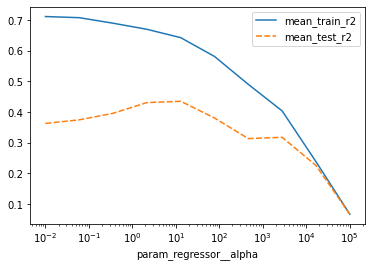

In [257]:
# Valeurs possibles du paramètre alpha
params = {"alpha" : np.logspace(-2, 5, 10)}

# Choisir un score à optimiser et/ou une erreur à minimiser, ici le R2 et le RMSE 
score = ('r2', 'neg_root_mean_squared_error')

# modèle
model = Ridge()

# fit et affichage des résultats
_, best_result = print_modelresult("SiteEnergyUse_log", features, df, params, model, score)

In [223]:
df["SiteEnergyUse(kBtu)"].describe()

count    6.213000e+03
mean     5.194722e+06
std      1.864972e+07
min      1.144100e+04
25%      9.296280e+05
50%      1.775433e+06
75%      4.075193e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'regressor__alpha': 0.35938136638046275}

Sur le jeu de test : 0.635


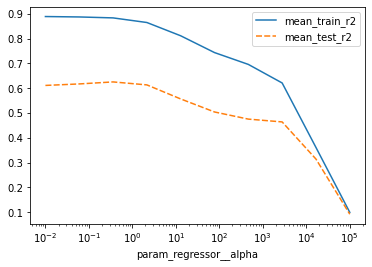

In [258]:
# Valeurs possibles du paramètre alpha
params = {"alpha" : np.logspace(-2, 5, 10)}

# Choisir un score à optimiser et/ou une erreur à minimiser, ici le R2 et le RMSE 
score = ('r2', 
         #'neg_mean_squared_log_error'
        )

# modèle
model = Ridge()

# fit et affichage des résultats
ridge_results, ridge_bestresult = print_modelresult("SiteEnergyUse(kBtu)", features, df, params, model, score)

## III.4 Lasso

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'regressor__alpha': 0.00021544346900318823}

Sur le jeu de test : 0.647


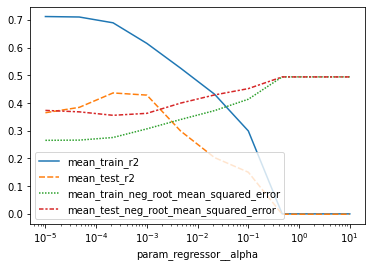

In [210]:
# Valeurs possibles du paramètre alpha
params = {"alpha" : np.logspace(-5, 1, 10)}

# Choisir un score à optimiser et/ou une erreur à minimiser, ici le R2 et le RMSE 
score = ('r2', 'neg_root_mean_squared_error')

# modèle
model = Lasso(max_iter=1e4)

# fit et affichage des résultats
lassoresults, lasso = print_modelresult("SiteEnergyUse_log", features, df, params, model, score)

In [1247]:
lasso

mean_train_r2                                0.652793
std_train_r2                               0.00453472
mean_train_neg_root_mean_squared_error       0.280041
std_train_neg_root_mean_squared_error      0.00183648
mean_test_r2                                 0.615914
std_test_r2                                 0.0279363
mean_test_neg_root_mean_squared_error        0.294196
std_test_neg_root_mean_squared_error        0.0109948
param_regressor__alpha                    0.000215443
mean_fit_time                                0.156904
std_fit_time                                0.0374525
mean_score_time                             0.0173067
std_score_time                            0.000439594
Name: 2, dtype: object

## III.5 ElasticNet

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'regressor__alpha': 0.0004832930238571752, 'regressor__l1_ratio': 0.1}

Sur le jeu de test : 0.617


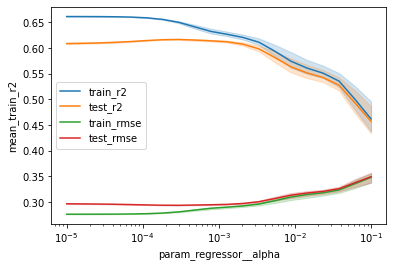

,mean_train_r2,std_train_r2,mean_train_neg_root_mean_squared_error,std_train_neg_root_mean_squared_error,mean_test_r2,std_test_r2,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,param_regressor__alpha,param_regressor__l1_ratio
56,0.651844,0.004177,0.280425,0.001720,0.619904,0.023856,0.292710,0.009428,0.000483293,0.1
63,0.647242,0.004212,0.282272,0.001741,0.619465,0.021818,0.292903,0.008684,0.00078476,0.1
49,0.655563,0.004100,0.278923,0.001683,0.619447,0.026097,0.292858,0.010251,0.000297635,0.1
42,0.658204,0.004060,0.277852,0.001662,0.618401,0.028186,0.293233,0.011017,0.000183298,0.1
70,0.642103,0.004219,0.284321,0.001762,0.618169,0.020209,0.293419,0.008066,0.00127427,0.1
...,...,...,...,...,...,...,...,...,...,...
135,0.455222,0.008547,0.350777,0.002450,0.450221,0.021103,0.352095,0.004299,0.1,0.7
136,0.440008,0.008025,0.355644,0.002404,0.436481,0.021606,0.356465,0.003976,0.1,0.9
137,0.436206,0.008071,0.356850,0.002419,0.432760,0.021702,0.357640,0.003919,0.1,0.95
138,0.433093,0.008076,0.357833,0.002412,0.429661,0.021787,0.358615,0.003892,0.1,0.99


In [1178]:
# Valeurs possibles de(s) (l')hyperparamètre(s)
params = {"alpha" : np.logspace(-5, -1, 20), "l1_ratio":[.1, .5, .7, .9, .95, .99, 1]}

# Choisir un score à optimiser et/ou une erreur à minimiser, ici le R2 et le RMSE 
score = ('r2', 'neg_root_mean_squared_error')

# modèle
model = ElasticNet(tol=0.001, max_iter=1e5)

# fit et affichage des résultats
print_modelresult("SiteEnergyUse_log", data, params, model, score)

# IV kNN

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'regressor__n_neighbors': 9}

Sur le jeu de test : 0.714


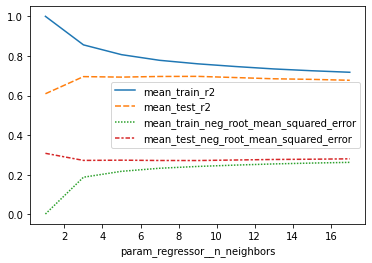

In [262]:
from sklearn.neighbors import KNeighborsRegressor

# Valeurs possibles du nombre de plus proches voisins
params = {"n_neighbors" : [1, 3, 5, 7, 9, 11, 13, 15, 17]}

# Choisir un score à optimiser et/ou une erreur à minimiser, ici le R2 et le RMSE 
score = ('r2', 'neg_root_mean_squared_error')

# modèle
model = KNeighborsRegressor()

# fit et affichage des résultats
log_knn_results, log_knn_bestresult = print_modelresult("SiteEnergyUse_log", features, df, params, model, score, axis_scale="linear", plot_param="n_neighbors")

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'regressor__n_neighbors': 1}

Sur le jeu de test : 0.424


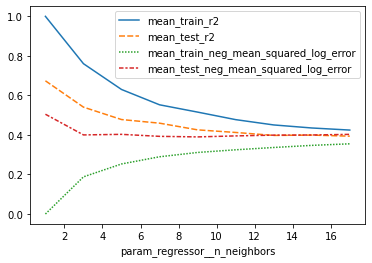

In [264]:
# Valeurs possibles du nombre de plus proches voisins
params = {"n_neighbors" : [1, 3, 5, 7, 9, 11, 13, 15, 17]}

# Choisir un score à optimiser et/ou une erreur à minimiser, ici le R2 et le RMSE 
score = ('r2', 
         'neg_mean_squared_log_error')

# modèle
model = KNeighborsRegressor()

# affichage des résultats
knn_results, knn_bestresult = print_modelresult("SiteEnergyUse(kBtu)", features, df, params, model, score, axis_scale="linear", plot_param="n_neighbors")

# V SVM

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'regressor__C': 5.994842503189409}

Sur le jeu de test : 0.614


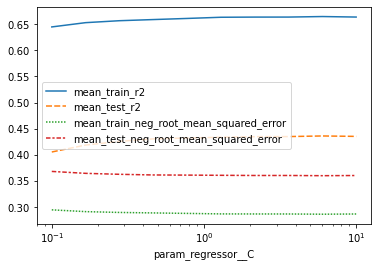

In [212]:
from sklearn.svm import LinearSVR

# Valeurs possibles du paramètre C
params = {"C" : np.logspace(-1, 1, 10)}

# Choisir un score à optimiser et/ou une erreur à minimiser, ici le R2 et le RMSE 
score = ('r2', 'neg_root_mean_squared_error')

# modèle
model = LinearSVR(tol=1e-3, max_iter=1e5, dual=False, loss="squared_epsilon_insensitive")

# fit et affichage des résultats
_, svm = print_modelresult("SiteEnergyUse_log", df, params, model, score, plot_param="C")

# VI Modèles non-linéaires

## VI.1 SVM à noyau

In [1953]:
from sklearn.svm import SVR
from sklearn import metrics

def print_SVR(quant_var, qualit_var, target, df, C, gamma, score):
    
    
    try:
        var = np.concatenate((quant_var, qualit_var))
        X = df[var].to_numpy().reshape(-1, len(var))
    except:
        var = np.concatenate(([quant_var], qualit_var))
        X = df[var].to_numpy().reshape(-1, len(var))
        
    y = df[target].to_numpy()


    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                     test_size=0.3 # 30% des données dans le jeu de test
                                    )
    
    quant_var_index = range(0, 5) # 5 variables quantitatives dans le modèle
    qualit_var_index = range(5, len(qualit_var)+len(quant_var))
    
    std_scale = StandardScaler().fit(X_train[:, quant_var_index])
    X_train_quant_std = std_scale.transform(X_train[:, quant_var_index])
    X_test_quant_std = std_scale.transform(X_test[:, quant_var_index])
    
    X_train_std = np.concatenate((X_train_quant_std, X_train[:, qualit_var_index]), axis=1)
    X_test_std = np.concatenate((X_test_quant_std, X_test[:, qualit_var_index]), axis=1)
    
    
    # Nested cross-validation
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=4)
    
    # Hyperparamètre à optimiser
    param_grid = {'C': C, "gamma":gamma}

    # Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
    regr = GridSearchCV(
    SVR(tol=1e-3, max_iter=1e5, kernel="rbf"), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

    # Optimiser ce classifieur sur le jeu d'entraînement
    regr.fit(X_train_std, y_train)

    # Calcul de la matrice de Gram
    kmatrix = metrics.pairwise.rbf_kernel(X_train_std, gamma=regr.best_params_["gamma"])
    
    # Afficher le(s) hyperparamètre(s) optimaux
    print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
    print(regr.best_params_)

    y_pred = regr.predict(X_test_std)
    print("\nSur le jeu de test : {:.3f}".format(r2_score(y_test, y_pred)))
    
    return kmatrix

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'regressor__C': 6.30957344480193, 'regressor__gamma': 0.046415888336127774}

Sur le jeu de test : 0.818


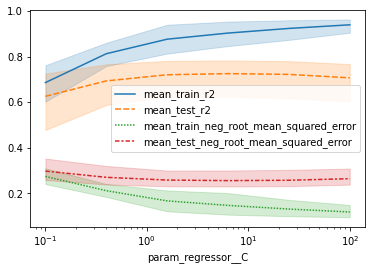

In [213]:
from sklearn.svm import SVR

# Valeurs possibles des hyperparamètres
params = {"C" : np.logspace(-1, 2, 6), "gamma":np.logspace(-2, 0, 4)}

# Choisir un score à optimiser et/ou une erreur à minimiser, ici le R2 et le RMSE 
score = ('r2', 'neg_root_mean_squared_error')

# modèle
model=SVR(tol=1e-3, max_iter=1e5, kernel="rbf")

# fit et affichage des résultats
_, kernelsvm = print_modelresult("SiteEnergyUse_log", df, params, model, score, plot_param="C")

#kmatrix = print_SVR(quant_var, qualit_var, "SiteEnergyUse_log", d2015, C, gamma, score)
#kmatrix100 = kmatrix[:100, :100]

#sns.heatmap(kmatrix)
#plt.show()

## VI.2 Régression ridge à noyau

In [75]:
from sklearn.kernel_ridge import KernelRidge

In [76]:
def print_kernelRidge(quant_var, qualit_var, target, df, alphas, gamma, score):
    
    
    try:
        var = np.concatenate((quant_var, qualit_var))
        X = df[var].to_numpy().reshape(-1, len(var))
    except:
        var = np.concatenate(([quant_var], qualit_var))
        X = df[var].to_numpy().reshape(-1, len(var))
        
    y = df[target].to_numpy()


    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                     test_size=0.3 # 30% des données dans le jeu de test
                                    )
    
    quant_var_index = range(0, 5) # 5 variables quantitatives dans le modèle
    qualit_var_index = range(5, len(qualit_var)+len(quant_var))
    
    std_scale = StandardScaler().fit(X_train[:, quant_var_index])
    X_train_quant_std = std_scale.transform(X_train[:, quant_var_index])
    X_test_quant_std = std_scale.transform(X_test[:, quant_var_index])
    
    X_train_std = np.concatenate((X_train_quant_std, X_train[:, qualit_var_index]), axis=1)
    X_test_std = np.concatenate((X_test_quant_std, X_test[:, qualit_var_index]), axis=1)
    
    # Nested cross-validation
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=4)
    
    # Hyperparamètre à optimiser
    param_grid = {'alpha': alphas, "gamma":gamma}

    # Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
    regr = GridSearchCV(
    KernelRidge(kernel="rbf"), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

    # Optimiser ce classifieur sur le jeu d'entraînement
    regr.fit(X_train_std, y_train)

    
    # Afficher le(s) hyperparamètre(s) optimaux
    print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
    print(regr.best_params_)

    y_pred = regr.predict(X_test_std)
    print("\nSur le jeu de test : {:.3f}".format(r2_score(y_test, y_pred)))

In [86]:
# Valeurs possibles du paramètre alpha
alphas = np.logspace(-3, -2, 4)
#alphas = [0.00046]

# choisir 4 valeurs pour gamma, entre 1e-2 et 10
gamma = np.logspace(-3, 0, 4)
#gamma = [1e-2]

# grille de paramètres
param_grid = {'alpha': alphas, 'gamma': gamma}

# Choisir un score à optimiser, ici le R2
score = 'r2'

print_kernelRidge(quant_var, qualit_var, "SiteEnergyUse_log", d2015, alphas, gamma, score)
#kmatrix100 = kmatrix[:100, :100]

#sns.heatmap(kmatrix)
#plt.show()

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'alpha': 0.01, 'gamma': 0.01}

Sur le jeu de test : 0.614


# VII Méthodes ensemblistes

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

## VII.1 Forêts aléatoires

Premier essai avec l'algorithme RandomForestRegressor sur les mêmes features que précédemment mais sans normalisation, et un nombre d'estimateurs à 100 (valeur par défaut, qui semble donner les meilleurs résultats sur quelques essais.)

In [2007]:
from sklearn.ensemble import RandomForestRegressor

d2015 = pd.concat([df2015[quantitative_features.append(targets)], cat_df], axis=1)
features = pd.Index([c for c in d2015.columns if c not in targets])

X = d2015[features].to_numpy()
y = d2015["SiteEnergyUse_log"].to_numpy()
                     
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                     test_size=0.3 # 30% des données dans le jeu de test
                                    )

rfr = RandomForestRegressor(n_estimators=100, oob_score=True)
model = rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print("R2 score: {}".format(r2_score(y_test, y_pred)))

R2 score: 0.7861359840850073


Deuxième essain cette fois avec normalisation des features, et recherche du meilleur nombre d'estimateur;

In [73]:
from sklearn.ensemble import RandomForestRegressor

def print_RFR(quant_var, qualit_var, target, df, n_estimators, score):
    
    try:
        var = np.concatenate((quant_var, qualit_var))
        X = df[var].to_numpy().reshape(-1, len(var))
    except:
        var = np.concatenate(([quant_var], qualit_var))
        X = df[var].to_numpy().reshape(-1, len(var))
        
    y = df[target].to_numpy()


    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                     test_size=0.3 # 30% des données dans le jeu de test
                                    )
    
    quant_var_index = range(0, 5) # 5 variables quantitatives dans le modèle
    qualit_var_index = range(5, len(qualit_var)+len(quant_var))
    
    std_scale = StandardScaler().fit(X_train[:, quant_var_index])
    X_train_quant_std = std_scale.transform(X_train[:, quant_var_index])
    X_test_quant_std = std_scale.transform(X_test[:, quant_var_index])
    
    X_train_std = np.concatenate((X_train_quant_std, X_train[:, qualit_var_index]), axis=1)
    X_test_std = np.concatenate((X_test_quant_std, X_test[:, qualit_var_index]), axis=1)
    
    # Nested cross-validation
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=4)
    
    # Hyperparamètre à optimiser
    param_grid = {'n_estimators': n_estimators}

    # Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
    regr = GridSearchCV(
    RandomForestRegressor(oob_score=True), # régresseur basé sur l'alogorithme RandomForest
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

    # Optimiser ce classifieur sur le jeu d'entraînement
    regr.fit(X_train_std, y_train)

    
    # Afficher le(s) hyperparamètre(s) optimaux
    print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
    print(regr.best_params_)

    y_pred = regr.predict(X_test_std)
    print("\nSur le jeu de test : {:.3f}".format(r2_score(y_test, y_pred)))
    print("params: ")
    print(regr.get_params())

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'regressor__n_estimators': 1000}

Sur le jeu de test : 0.858


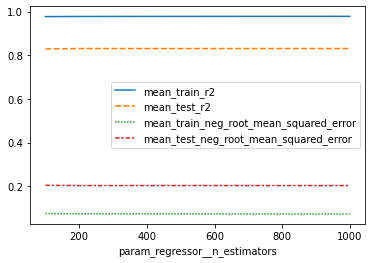

In [214]:
from sklearn.ensemble import RandomForestRegressor

# Valeurs possibles du nombre d'arbres
params = {"n_estimators" : [100, 200, 500, 1000]}

# Choisir un score à optimiser, ici le R2
score = ('r2', 'neg_root_mean_squared_error')

# modèle
model=RandomForestRegressor(oob_score=True)

# fit et affichage des résultats
_, randomforest = print_modelresult("SiteEnergyUse_log", 
                                    df, 
                                    params, 
                                    model, 
                                    score, 
                                    plot_param="n_estimators",
                                    axis_scale="linear")

In [217]:
_

,mean_train_r2,std_train_r2,mean_train_neg_root_mean_squared_error,std_train_neg_root_mean_squared_error,mean_test_r2,std_test_r2,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,param_regressor__n_estimators,mean_fit_time,std_fit_time,mean_score_time,std_score_time
3,0.978309,0.000630,0.072782,0.001710,0.830983,0.016695,0.203075,0.017532,1000,158.283766,5.898714,0.511629,0.006046
1,0.977713,0.000599,0.073777,0.001634,0.830851,0.016781,0.203154,0.017607,200,31.377143,0.990068,0.114332,0.003371
2,0.978039,0.000618,0.073234,0.001676,0.830725,0.016846,0.203232,0.017645,500,76.191120,0.398310,0.261309,0.001971
0,0.977006,0.000758,0.074935,0.001860,0.828897,0.016923,0.204320,0.017638,100,16.460281,1.503900,0.064748,0.000751


## VII.2 GradientBoostingRegressor

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

In [66]:
def print_GBR(quant_var, qualit_var, target, df, n_estimators, score):
    
    try:
        var = np.concatenate((quant_var, qualit_var))
        X = df[var].to_numpy().reshape(-1, len(var))
    except:
        var = np.concatenate(([quant_var], qualit_var))
        X = df[var].to_numpy().reshape(-1, len(var))
        
    y = df[target].to_numpy()


    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                     test_size=0.3 # 30% des données dans le jeu de test
                                    )
    
    quant_var_index = range(0, 5) # 5 variables quantitatives dans le modèle
    qualit_var_index = range(5, len(qualit_var)+len(quant_var))
    
    std_scale = StandardScaler().fit(X_train[:, quant_var_index])
    X_train_quant_std = std_scale.transform(X_train[:, quant_var_index])
    X_test_quant_std = std_scale.transform(X_test[:, quant_var_index])
    
    X_train_std = np.concatenate((X_train_quant_std, X_train[:, qualit_var_index]), axis=1)
    X_test_std = np.concatenate((X_test_quant_std, X_test[:, qualit_var_index]), axis=1)
    
    # Nested cross-validation
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=4)
    
    # Hyperparamètre à optimiser
    param_grid = {'n_estimators': n_estimators}

    # Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
    regr = GridSearchCV(
    GradientBoostingRegressor(), # régresseur basé sur l'alogorithme RandomForest
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

    # Optimiser ce classifieur sur le jeu d'entraînement
    regr.fit(X_train_std, y_train)

    
    # Afficher le(s) hyperparamètre(s) optimaux
    print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
    print(regr.best_params_)

    y_pred = regr.predict(X_test_std)
    print("\nSur le jeu de test : {:.3f}".format(r2_score(y_test, y_pred)))

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'regressor__n_estimators': 4000}

Sur le jeu de test : 0.859


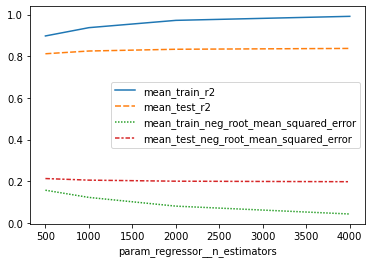

In [215]:
from sklearn.ensemble import GradientBoostingRegressor

# Valeurs possibles du nombre d'arbres
params = {"n_estimators": [500, 1000, 2000, 4000]}

# Choisir un score à optimiser, et/ou une erreur à minimiser ici le R2 et le RMSE
score = ('r2', 'neg_root_mean_squared_error')

# modèle
model=GradientBoostingRegressor()

# fit et affichage des résultats
grboost, gradientboosting = print_modelresult("SiteEnergyUse_log", 
                                    df, 
                                    params, 
                                    model, 
                                    score, 
                                    plot_param="n_estimators",
                                    axis_scale="linear")

In [216]:
grboost

,mean_train_r2,std_train_r2,mean_train_neg_root_mean_squared_error,std_train_neg_root_mean_squared_error,mean_test_r2,std_test_r2,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,param_regressor__n_estimators,mean_fit_time,std_fit_time,mean_score_time,std_score_time
3,0.992206,0.000692,0.043575,0.001825,0.838226,0.018320,0.198571,0.017628,4000,35.808777,1.589657,0.605534,0.008367
2,0.972886,0.001475,0.081349,0.002491,0.834206,0.016145,0.201052,0.016221,2000,17.216456,0.100806,0.118779,0.002266
1,0.937859,0.001412,0.123187,0.002194,0.825803,0.011561,0.206129,0.013707,1000,8.613889,0.100701,0.062508,0.002127
0,0.898064,0.002707,0.157758,0.002173,0.812619,0.011593,0.213771,0.013501,500,4.364814,0.143104,0.038047,0.001722


# VIII Choix du modèle

In [1278]:
index = ["mean_test_r2", "mean_train_r2","mean_test_neg_root_mean_squared_error", "mean_fit_time"]
df = {"Ridge":ridge[index], 
      "Lasso":lasso[index],
      "kNN":knn[index],
      "SVM":svm[index], "SVM Non-linéaire": kernelsvm[index], "randomforest":randomforest[index], 
      "gradient boosting":gradientboosting[index]}
results = pd.DataFrame(data=df)
results

,Ridge,Lasso,kNN,SVM,SVM Non-linéaire,randomforest,gradient boosting
mean_test_r2,0.620365,0.615914,0.698317,0.619368,0.762717,0.826424,0.820197
mean_train_r2,0.648884,0.652793,0.801355,0.646881,0.808213,0.976762,0.995316
mean_test_neg_root_mean_squared_error,0.292555,0.294196,0.260785,0.29291,0.23129,0.197891,0.201305
mean_fit_time,0.0702611,0.156904,0.0310595,0.0415668,0.964753,38.8878,20.9807


# Annexes

In [437]:
# On regroupe TotalGHGEmissions en 10 catégories
deciles = data["TotalGHGEmissions"].describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# On groupe TotalGHGEmissions en 10 catégories
bins = deciles[4:-1].to_numpy()
cat_TotalGHG = np.digitize(data.TotalGHGEmissions, bins)

# Création d'une Series pour pouvoir concatener
cat_TotalGHG = pd.Series(data=cat_TotalGHG, name="cat_TotalGHG", index=range(0, cat_TotalGHG.shape[0]))

### Latitude, Longitude

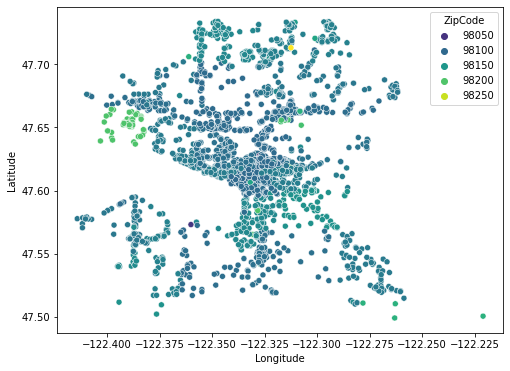

In [945]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Longitude', y="Latitude", data=data[data.ZipCode.notna()], hue="ZipCode", palette="viridis")
plt.show()

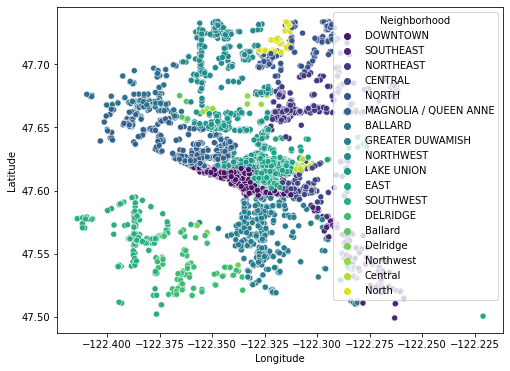

In [446]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Longitude", y='Latitude', data=data, hue="Neighborhood", palette="viridis")
plt.show()